<html>
<head>
<style>
    body {
        font-family: 'Arial', sans-serif;
        margin-left: 40px;
        background: #ECE9E6;  /* Color de fondo general */
        background: -webkit-linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado para Chrome */
        background: linear-gradient(to right, #FFFFFF, #ECE9E6);  /* Degradado estándar */
    }
    .header {
        color: #2E86C1; /* Azul oscuro */
        padding-bottom: 10px;
        font-size: 32px;
        font-weight: bold;
        border-bottom: 3px solid #2E86C1; /* Borde con el mismo color para consistencia */
    }
    .subheader {
        color: #3498DB; /* Azul un poco más claro */
        padding-top: 5px;
        font-size: 24px;
    }
    .description {
        color: #5DADE2; /* Azul aún más claro para el cuerpo de texto */
        padding: 20px 0;
        font-size: 16px;
        text-align: left;
    }
    .footer {
        color: #AED6F1; /* Azul muy claro para la fecha */
        font-size: 14px;
        padding-top: 30px;
    }
</style>
</head>
<body>

<div class="header">
    Series de Tiempo (Predicción y Caos)
</div>

<div class="subheader">
    Alumno: Rodrigo Gerardo Trejo Arriaga
</div>

<div class="description">
    <strong>Título de la Práctica:</strong> Generación de datos caóticos
    <br><br>
    Este trabajo se centra en el análisis de los datos obtenidos en la caminata de un caminante aleatorio alimentado por diferentes modelos caóticos
</div>

<div class="footer">
    Fecha de Entrega: <strong>30 de Abril, 2024</strong>
</div>

</body>
</html>


In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
def cargar_csv(ruta:str, separador:str):

    try:
        with open(ruta, 'r', encoding='utf-8') as archivo:
            lineas = archivo.readlines()

            datos = [linea.strip().split(separador) for linea in lineas]
            
            datos = datos[0][:40000]
            
            if separador ==  ",":
                return [int(dato) for dato in datos]
            else:
                return [tuple(map(int, item.split(','))) for item in datos]
                
    except FileNotFoundError:
        print("El archivo no fue encontrado.")
        return []

def convertir_camelCase(text):
    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
    words = cleaned_text.split()
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

In [133]:
def graficar(x, t, plot_type='scatter', width=15, height=10, save_as_pdf=False, titulo="Diagrama de bifurcación cúbica de Feigenbaum"):
    """
    Crea un gráfico utilizando Matplotlib con estilo personalizado y márgenes ajustados.
    """
    plt.style.use('seaborn-darkgrid')
    plt.rcParams['axes.facecolor'] = '#e9f0fb'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = 'black'

    fig, ax = plt.subplots(figsize=(width*1.5, height*1.5))
    fig.subplots_adjust(left=0.15, right=1, top=0.85, bottom=0.15)

    # Crear el gráfico
    if plot_type == 'scatter':
        ax.scatter(t, x, color='blue', marker='o', s=0.1)
    elif plot_type == 'line':
        ax.plot(t, x, color='blue', linewidth=1)

    ax.set_title(titulo, fontsize=16, loc='left', pad=20, color='black')
    ax.set_xlabel('Tasa de crecimiento t', fontsize=13, labelpad=15, color='black')
    ax.set_ylabel('Valor de x', fontsize=13, labelpad=15, color='black')
    ax.tick_params(axis='both', which='major', labelsize=10)

    if save_as_pdf:
        plt.savefig(f"{titulo.replace(' ', '_')}.pdf", format='pdf', dpi=300)

    plt.show()

In [134]:
def plot_occupied_area_custom_style_updated(cube_size, positions, save_as_pdf=False, title="Porcentaje de Posiciones visitadas"):
    """
    Función para graficar el porcentaje de área ocupada por un caminante aleatorio en una cámara cúbica con estilo personalizado.
    
    Parámetros:
    - cube_size (int): tamaño de un lado de la cámara cúbica.
    - positions (list of tuples): lista de posiciones (x, y, z) por las que ha pasado el caminante.
    - save_as_pdf (bool): si es True, guarda el gráfico como PDF.
    - title (str): título del gráfico.
    """
    import matplotlib.pyplot as plt
    
    # Estilos personalizados
    plt.style.use('seaborn-darkgrid')
    plt.rcParams['axes.facecolor'] = '#e9f0fb'
    plt.rcParams['grid.color'] = 'white'
    plt.rcParams['grid.linestyle'] = '-'
    plt.rcParams['grid.linewidth'] = 1.5
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = 'black'

    # Total de celdas en la cámara
    total_cells = cube_size ** 3

    # Conjunto para almacenar posiciones únicas
    unique_positions = set()

    # Lista para guardar el porcentaje de área ocupada en cada paso del tiempo
    occupied_percentage = []

    # Calcular los porcentajes de ocupación
    for position in positions:
        unique_positions.add(position)
        occupied_percentage.append(len(unique_positions) / total_cells * 100)

    # Configuración del gráfico
    fig, ax = plt.subplots(figsize=(12*1.5, 7*1.5))
    fig.subplots_adjust(left=0.15, right=1, top=0.85, bottom=0.15)

    # Crear el gráfico
    ax.plot(list(range(1, len(occupied_percentage) + 1)), occupied_percentage, 'o-', color='blue', markersize=1, linewidth=1.5)
    
    # Configuración de título y etiquetas
    ax.set_title(title, fontsize=16, loc='left', pad=20, color='black')
    ax.set_xlabel('Paso de Tiempo', fontsize=13, labelpad=15, color='black')
    ax.set_ylabel('Porcentaje de Área Ocupada (%)', fontsize=13, labelpad=15, color='black')
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Guardar como PDF si se requiere
    if save_as_pdf:
        plt.savefig(f"{title.replace(' ', '_')}.pdf", format='pdf', dpi=300)

    plt.show()


In [135]:
def plotear_hist(array: np.ndarray, titulo: str, label_x: str, label_y: str, criterio: str = 'sturges', guardar=False) -> None:
    """
    Genera y guarda un histograma con estilos personalizados, colores aleatorios para cada barra,
    y el número de bins determinado por el criterio especificado.

    Args:
        array (np.ndarray): Array de Numpy con los datos que se quieren plasmar en el histograma.
        titulo (str): Título del histograma.
        label_x (str): Etiqueta del eje x del histograma.
        label_y (str): Etiqueta del eje y del histograma.
        ruta_img (str): Ruta donde se guardará la imagen del histograma.
        criterio (str): Método para calcular el número de bins ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice').

    Returns:
        None: La función no retorna nada.
    """
    plt.style.use('dark_background')
    
    match criterio:
        case 'sturges':
            bins = int(1 + np.log2(len(array)))
        case 'freedman-diaconis':
            iqr = np.subtract(*np.percentile(array, [75, 25]))
            bin_width = 2 * iqr * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'scott':
            bin_width = 3.5 * np.std(array) * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'raiz_cuadrada':
            bins = int(np.sqrt(len(array)))
        case 'rice':
            bins = int(2 * len(array) ** (1/3))
        case 'secreto':
            bins = len(set(array))
        case _:
            raise ValueError("Criterio no reconocido. Usa 'sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', o 'rice'.")

    n, bins, patches = plt.hist(array, bins=bins, alpha=0.75, rwidth=0.85)

    for patch in patches:
        plt.setp(patch, 'facecolor', np.random.rand(3,))
        
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title(titulo, fontsize=20, fontweight='bold', color=np.random.rand(3,))
    plt.xlabel(label_x, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylabel(label_y, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylim(0, max(n)*1.1)

    if guardar:
        ruta_img = f"{convertir_camelCase(titulo)}.pdf"
        plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    
    plt.show()


## Caminante de Feigenbaum

### Dirección

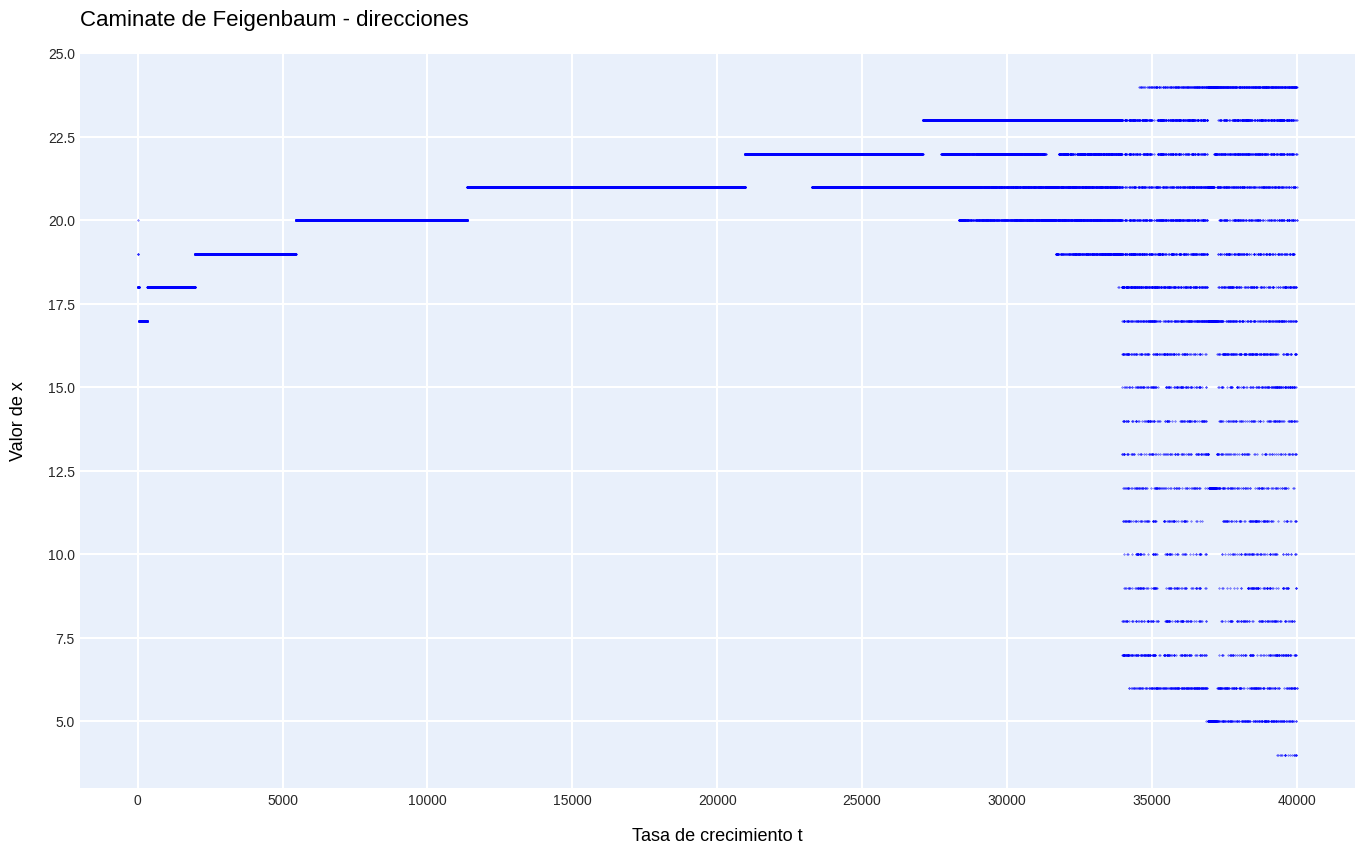

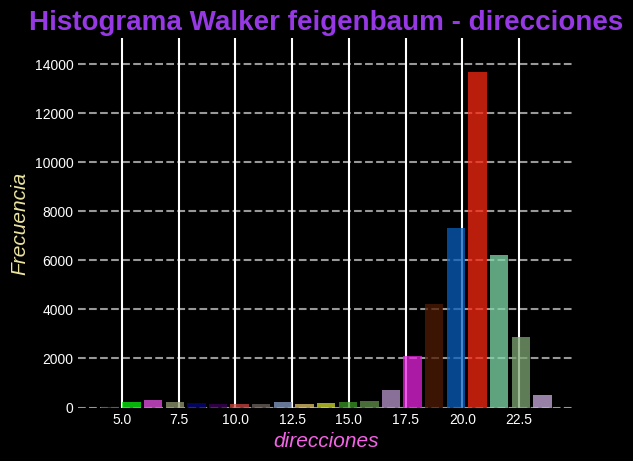

In [136]:
modelo = "feigenbaum"
metrica = "direcciones"
folder = "Feigenbaum"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia", criterio="secreto")

### Distancia

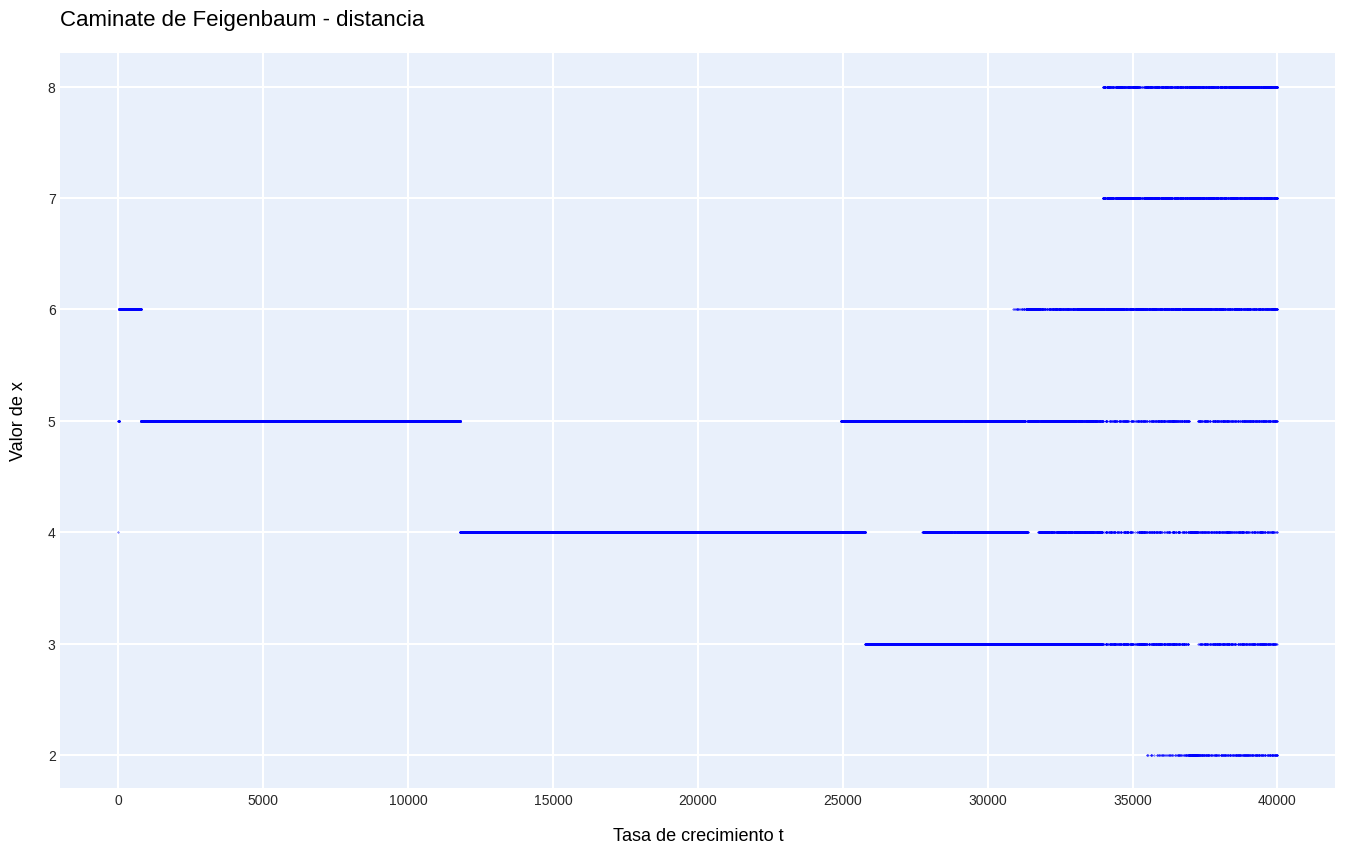

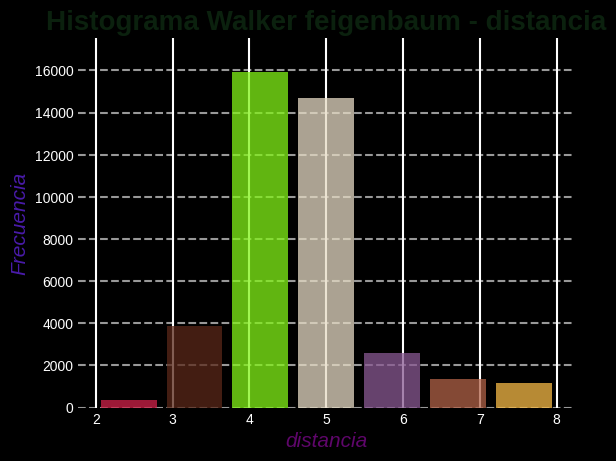

In [137]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia", criterio="secreto")

### Choques

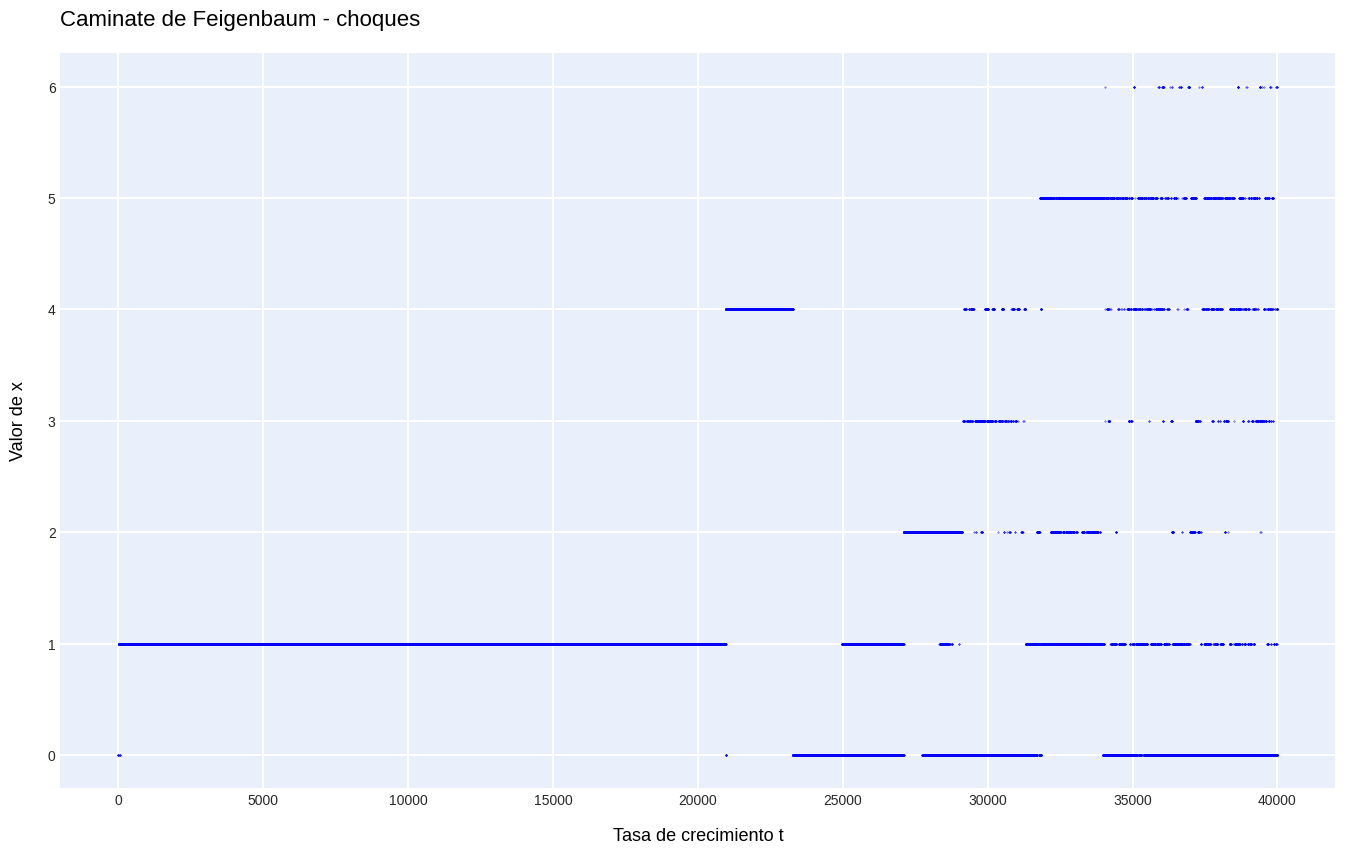

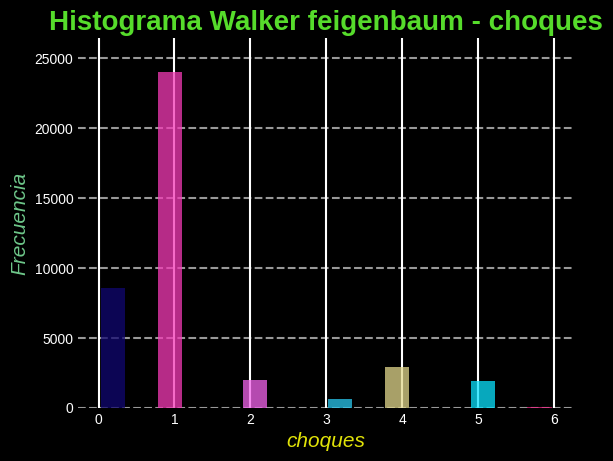

In [138]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {convertir_camelCase(modelo)} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(32, 21, 49), (37, 16, 44), (42, 11, 39), (47, 6, 34), (42, 1, 29), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (41, 0, 28), (35, 0, 34), (29, 0, 40), (23, 0, 46), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 49), (20, 0, 

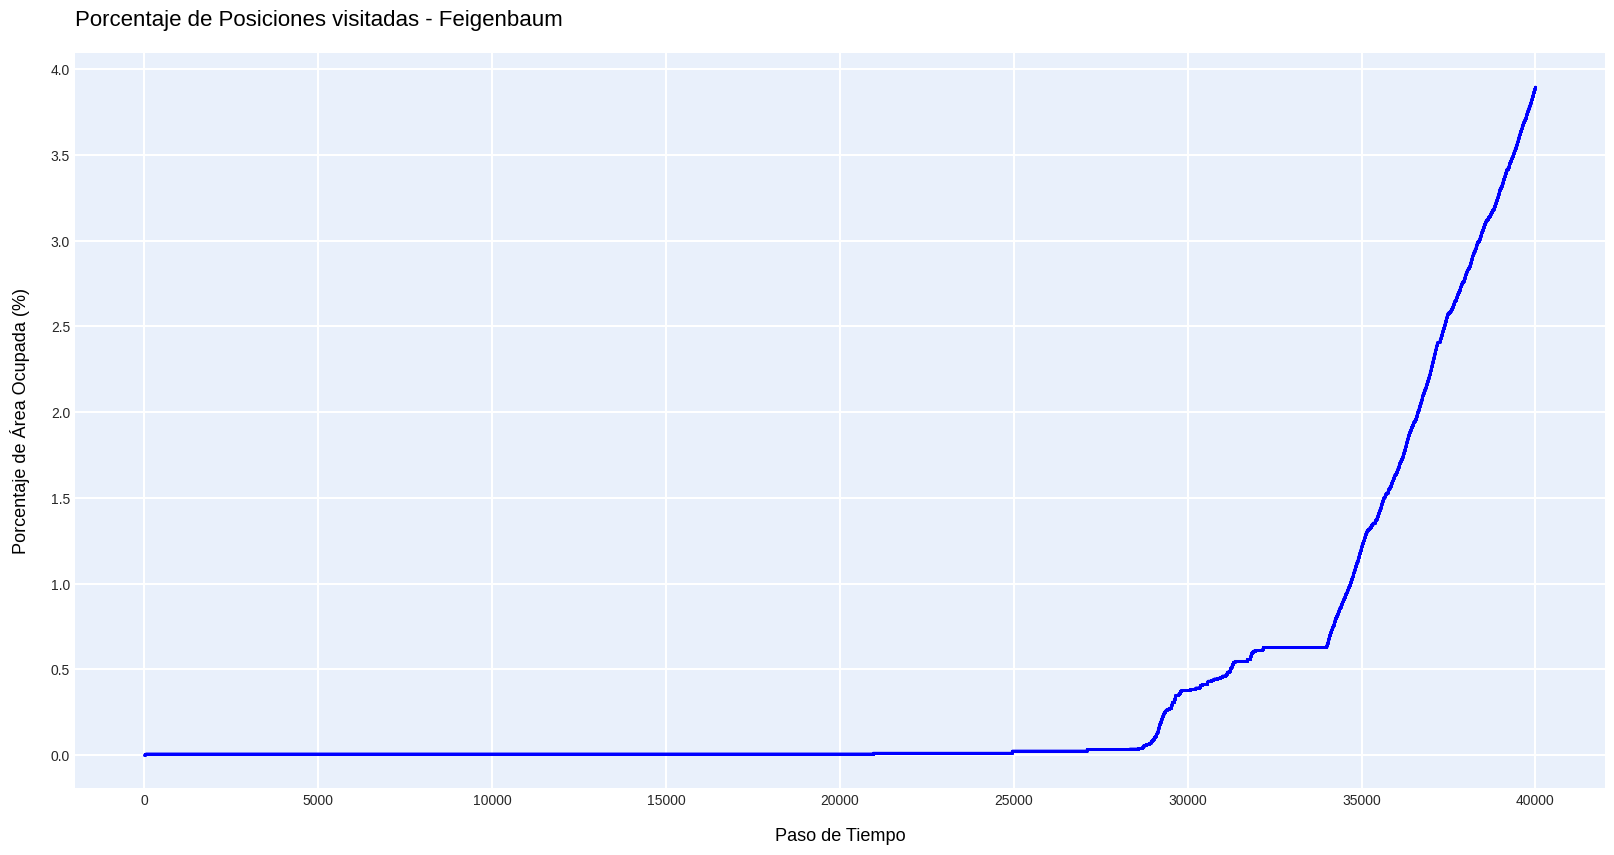

In [139]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Caminante de Feigenbaum Exponencial

### Direcciones

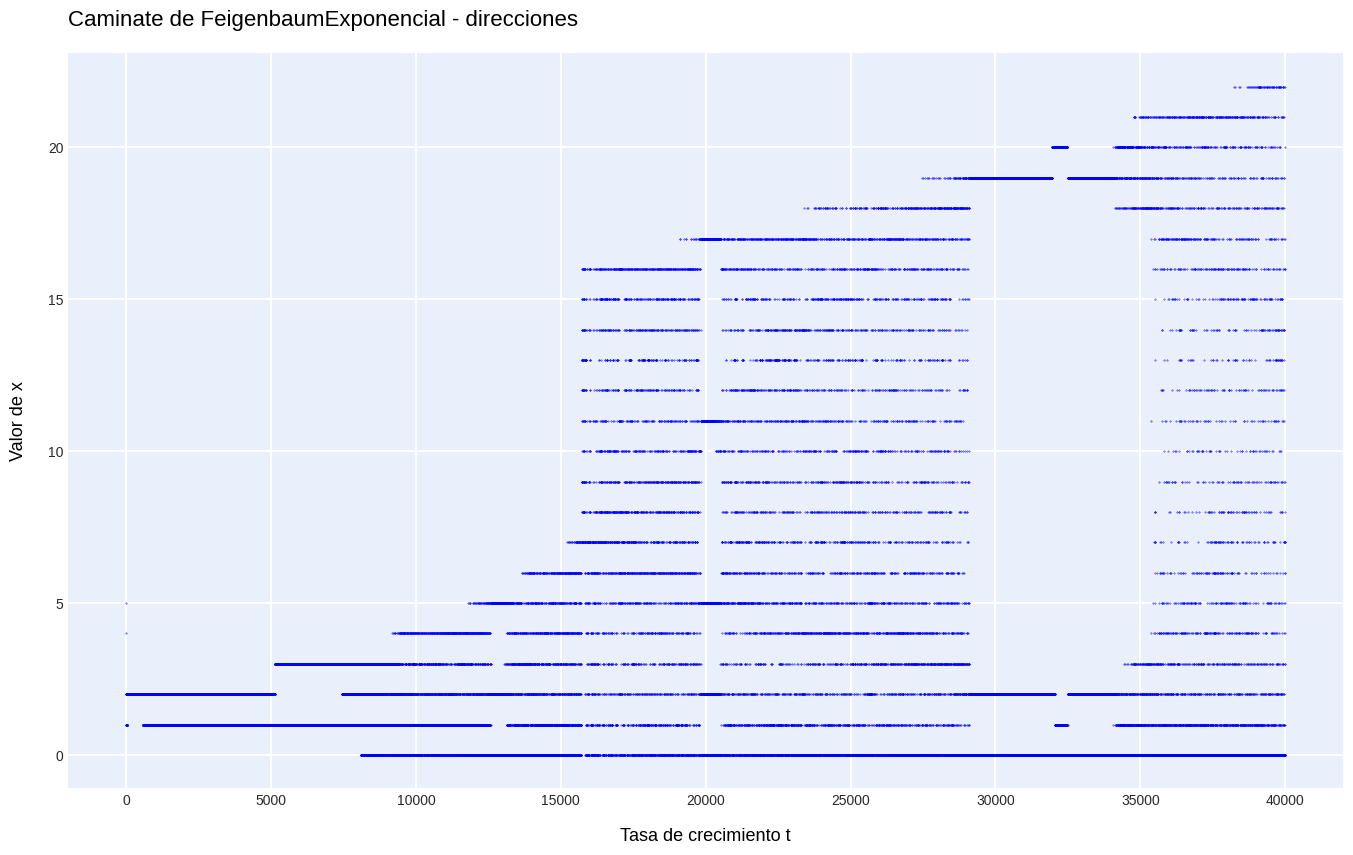

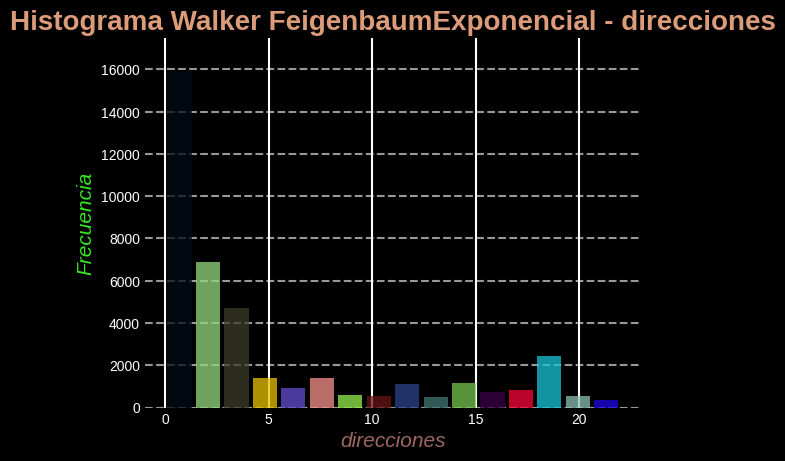

In [140]:
modelo = "feigenbaumexponencial"
metrica = "direcciones"
folder = "FeigenbaumExponencial"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancia

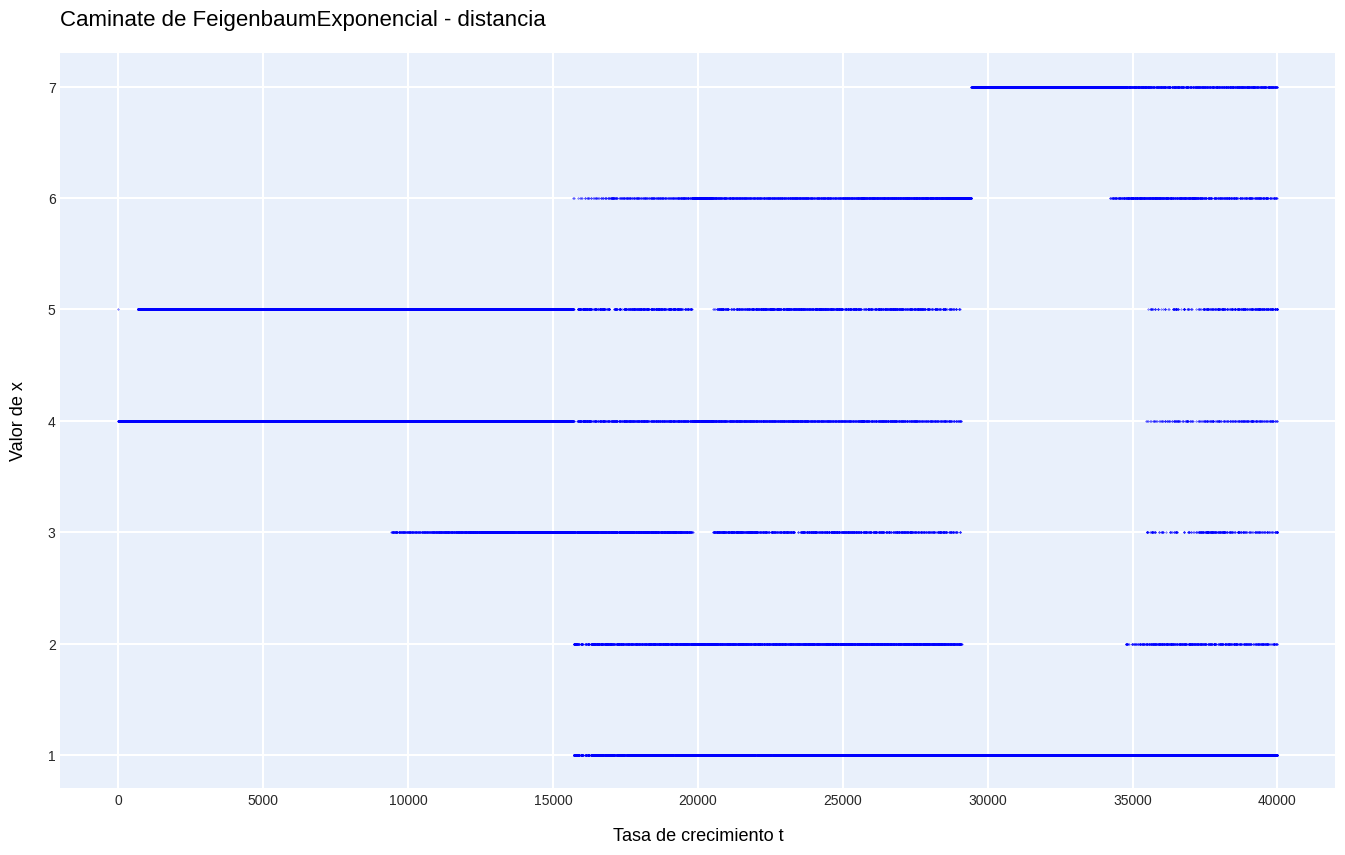

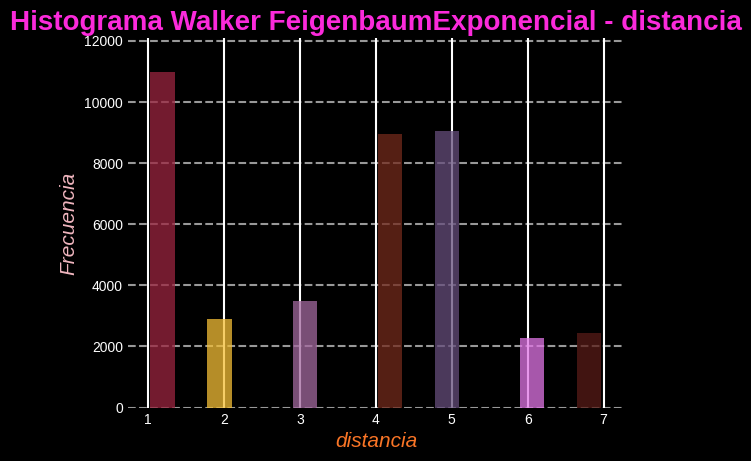

In [141]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

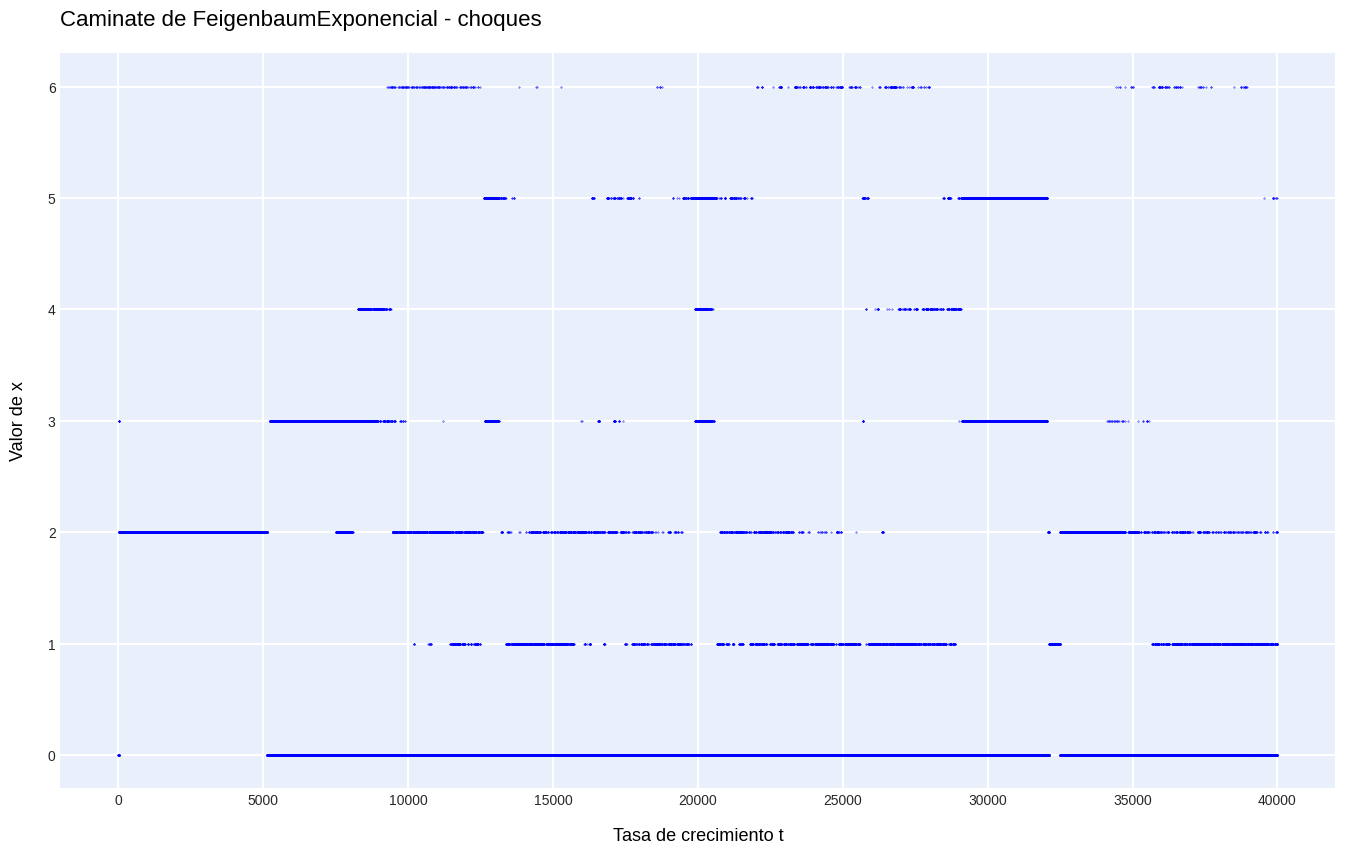

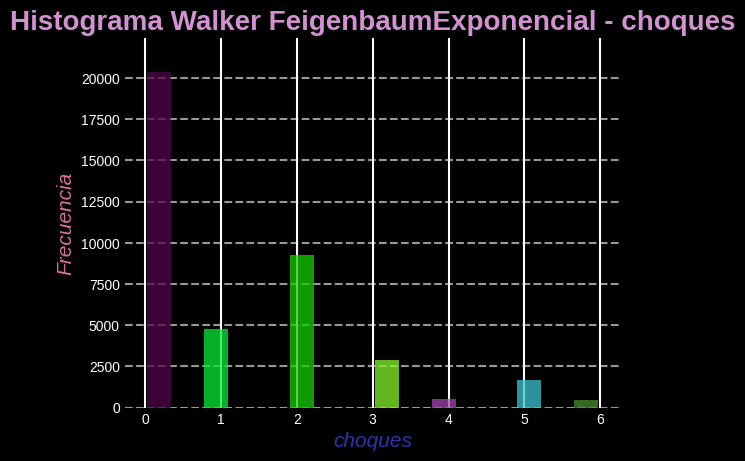

In [142]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(5, 25, 25), (5, 25, 29), (5, 30, 29), (9, 30, 29), (9, 34, 29), (13, 34, 29), (13, 38, 29), (17, 38, 29), (17, 42, 29), (21, 42, 29), (21, 46, 29), (25, 46, 29), (25, 49, 29), (29, 49, 29), (29, 49, 29), (33, 49, 29), (33, 49, 29), (37, 49, 29), (37, 49, 29), (41, 49, 29), (41, 49, 29), (45, 49, 29), (45, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 29), (49, 49, 2

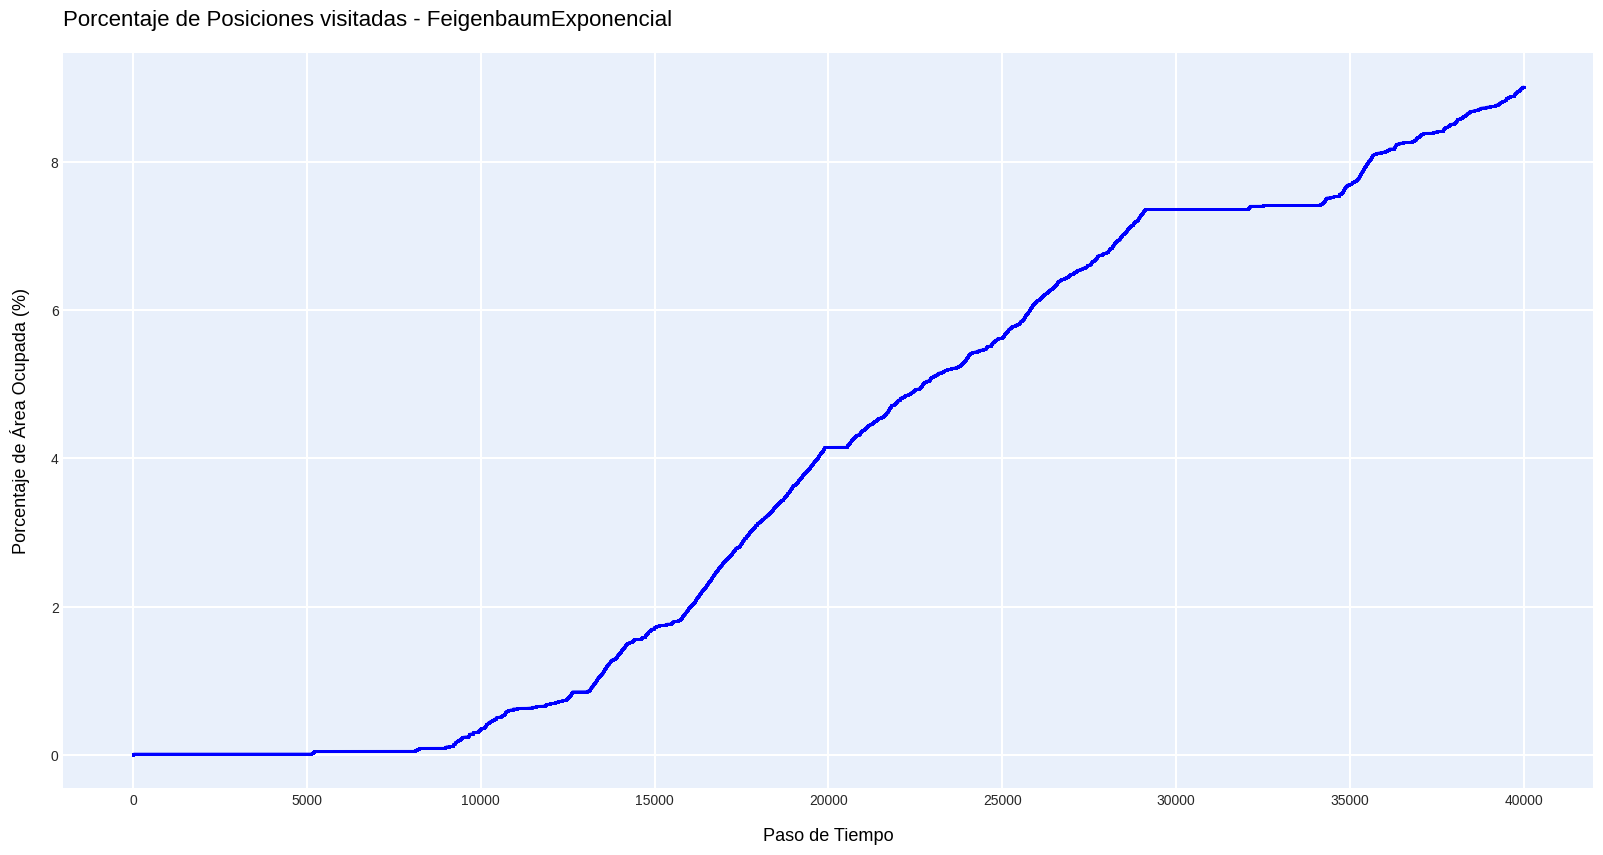

In [143]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Caminante de Feigenbaum Cúbico

### Direccion

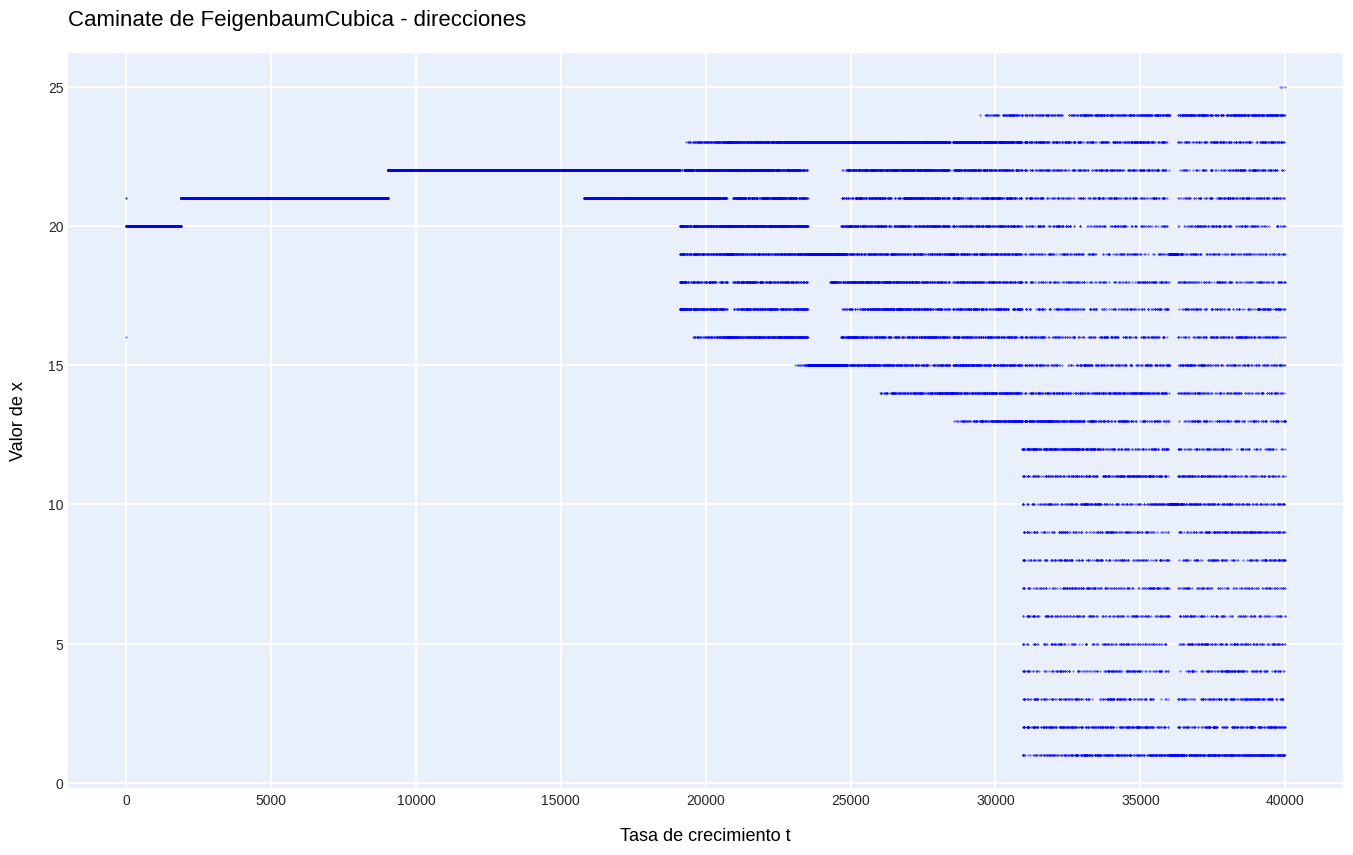

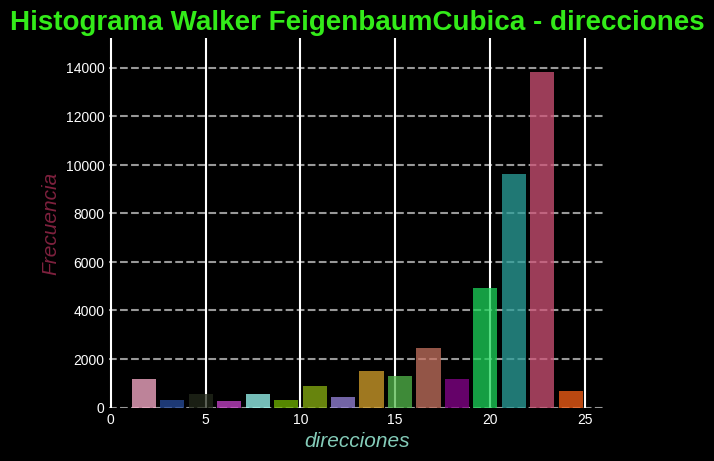

In [144]:
modelo = "feigenbaumcubica"
metrica = "direcciones"
folder = "FeigenbaumCubica"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancia

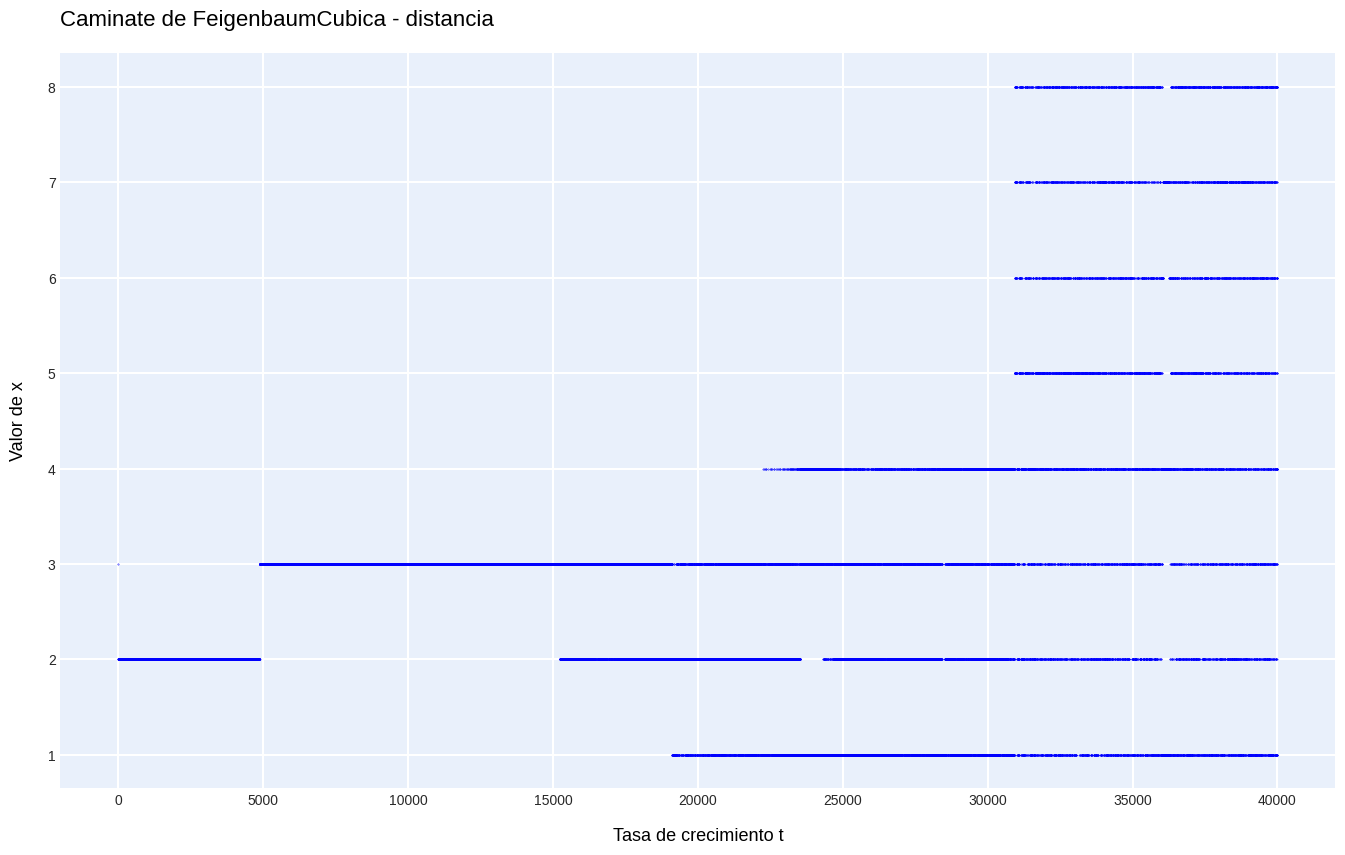

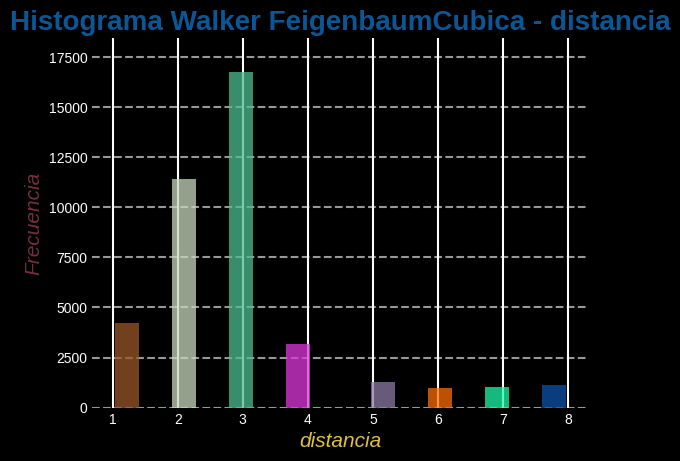

In [145]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

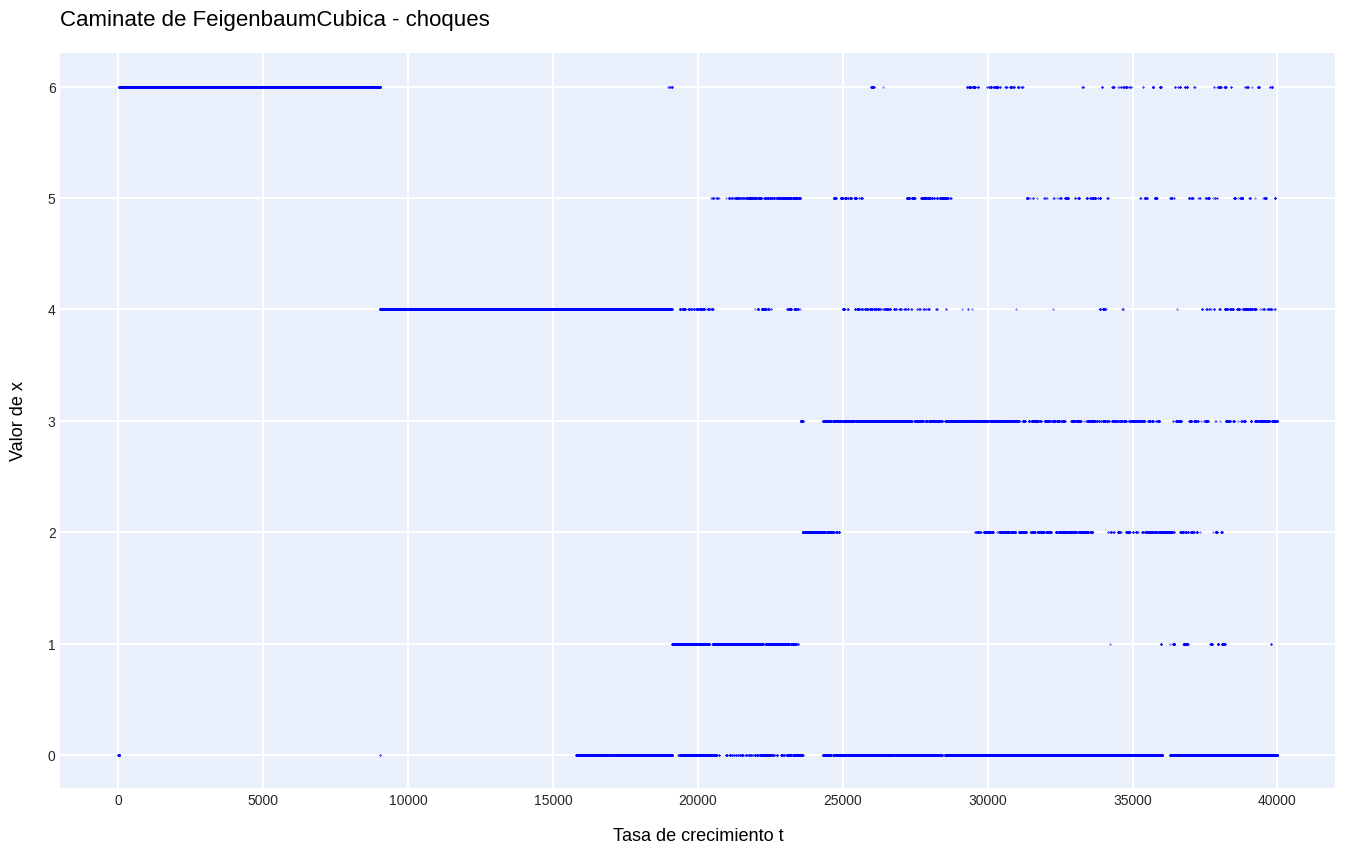

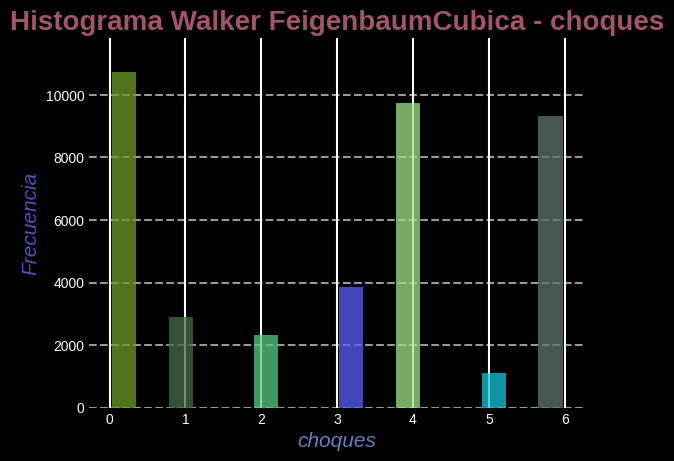

In [146]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(42, 48, 5), (44, 46, 7), (46, 44, 9), (44, 42, 11), (42, 40, 13), (40, 38, 15), (38, 36, 17), (36, 34, 19), (34, 32, 21), (32, 30, 23), (30, 28, 25), (28, 26, 27), (26, 24, 29), (24, 22, 31), (22, 20, 33), (20, 18, 35), (18, 16, 37), (16, 14, 39), (14, 12, 41), (12, 10, 43), (10, 8, 45), (8, 6, 47), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (6, 4, 49), (

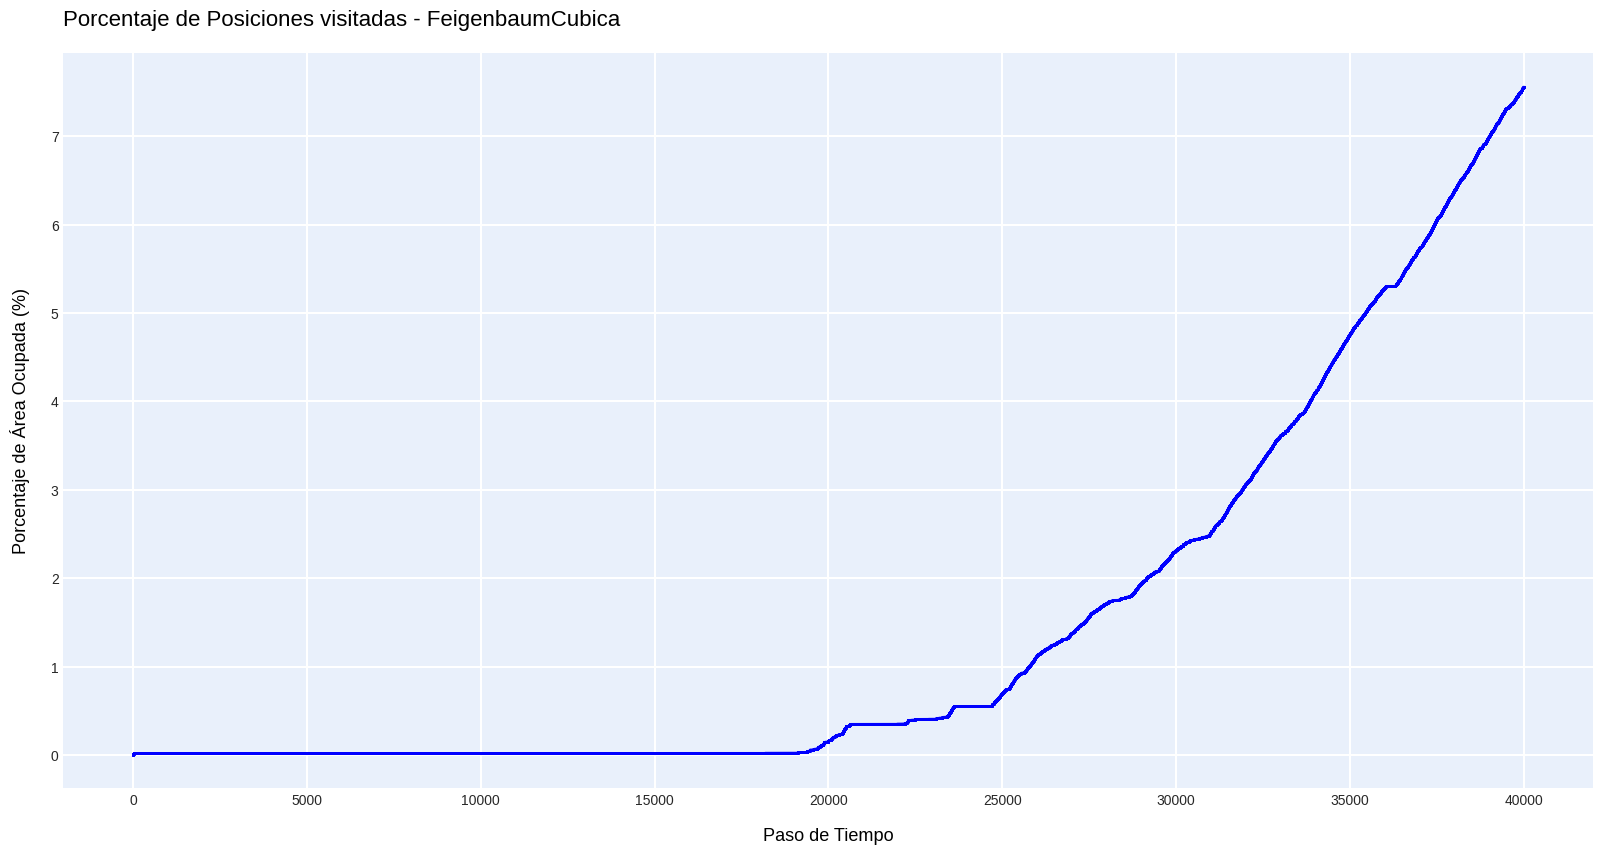

In [147]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Caminante de Feigenbaum Triangular

### Dirección

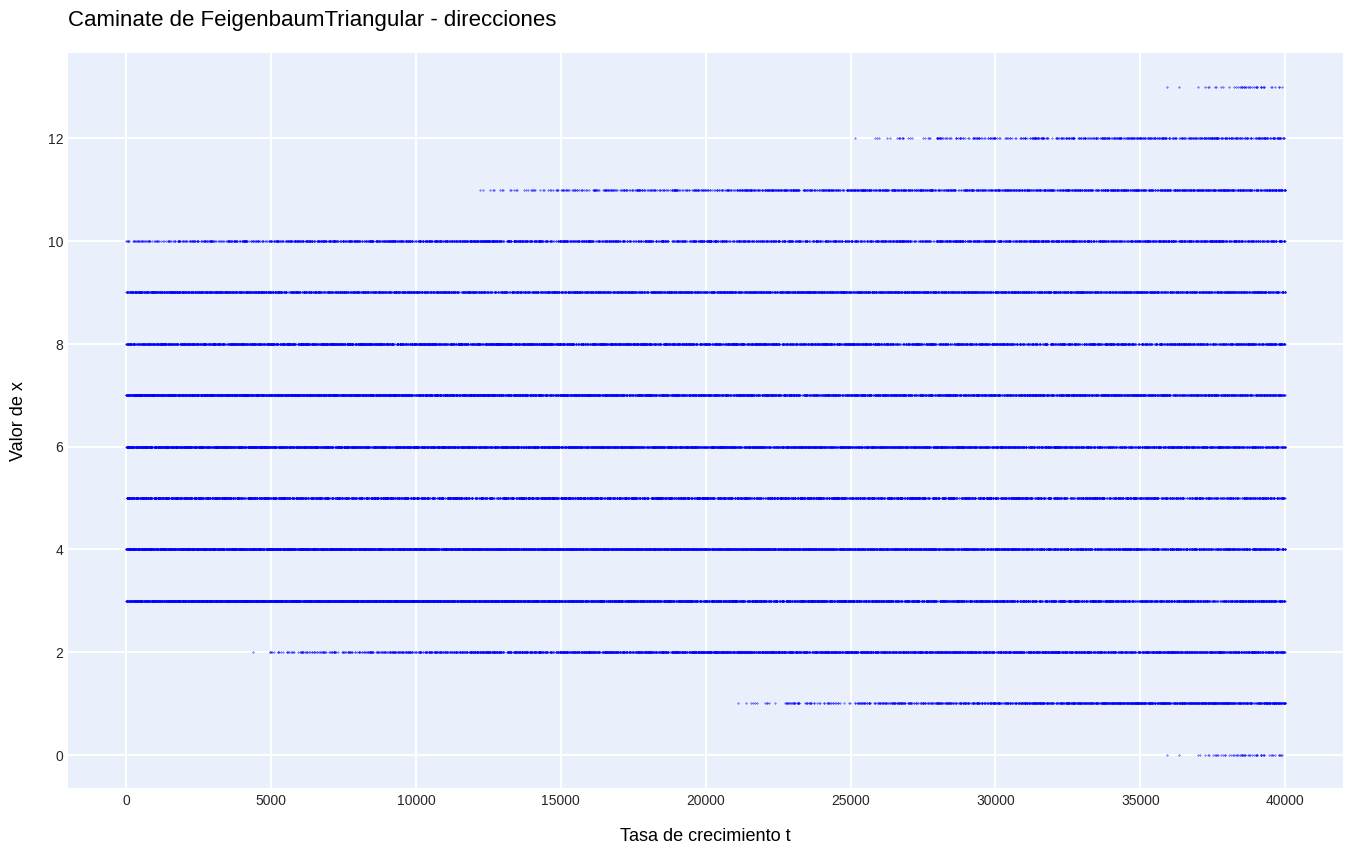

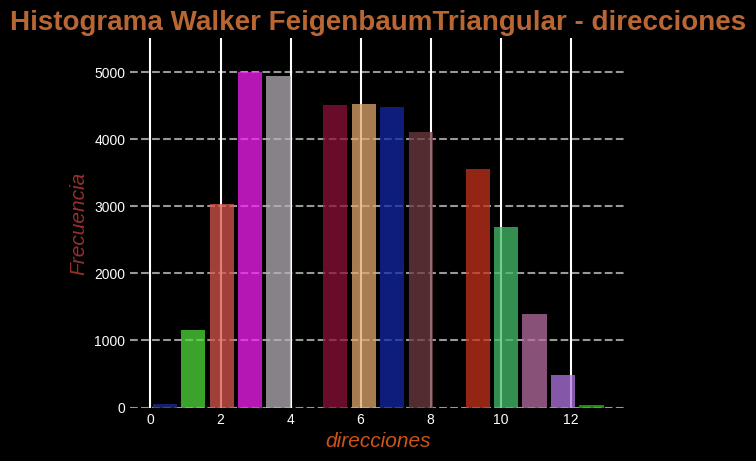

In [148]:
modelo = "feigenbaumtriangular"
metrica = "direcciones"
folder = "FeigenbaumTriangular"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancia

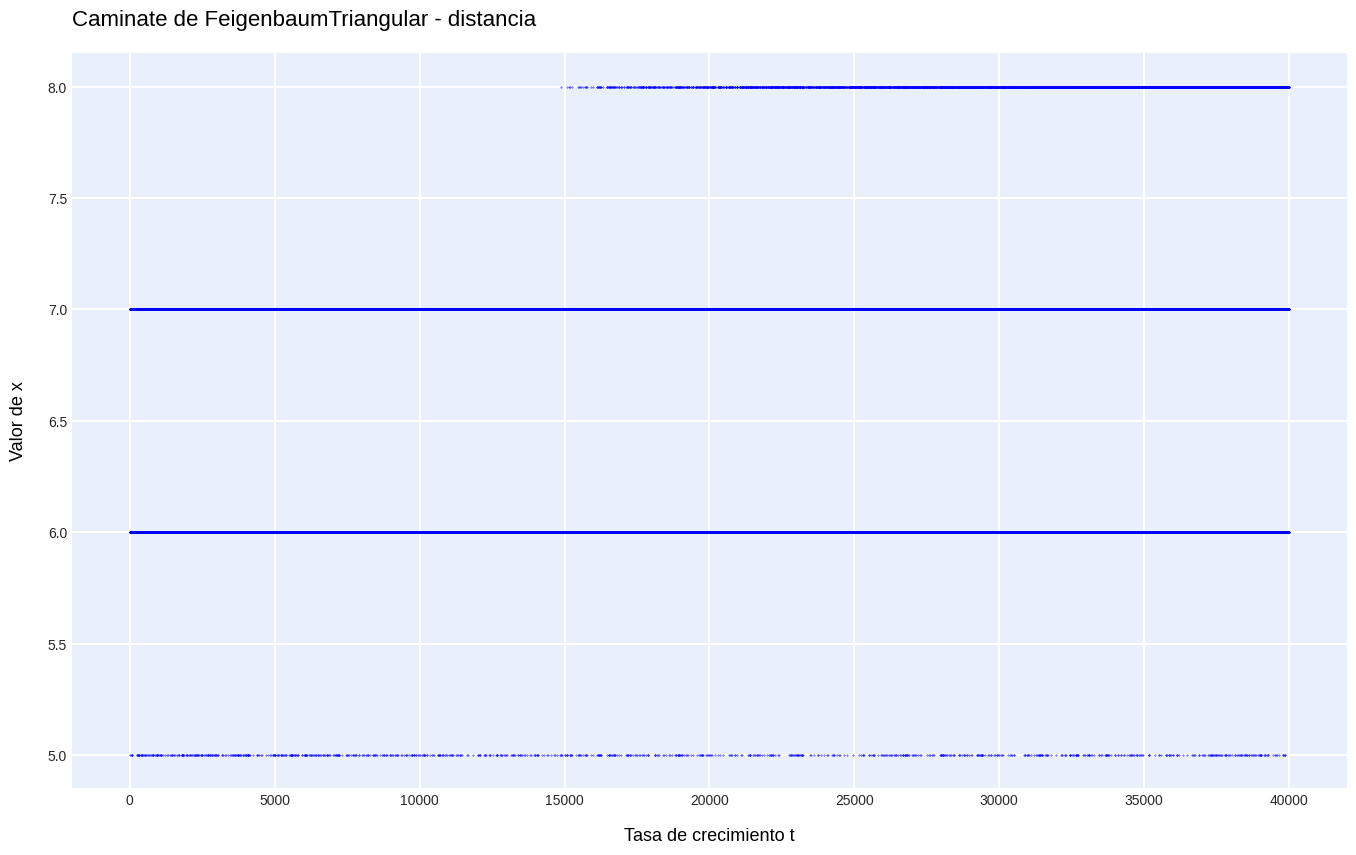

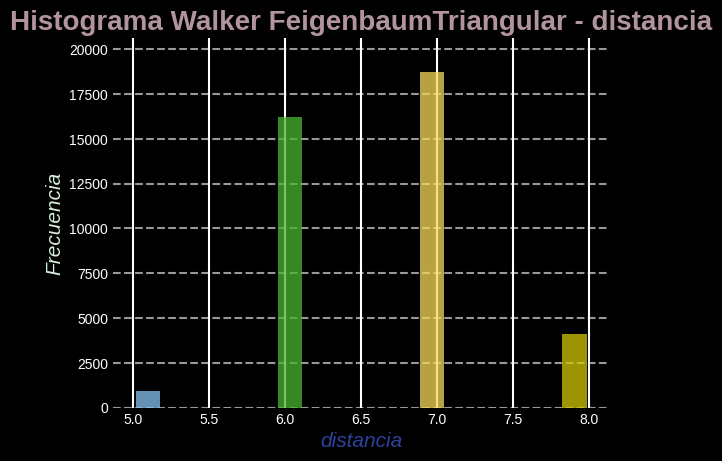

In [149]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

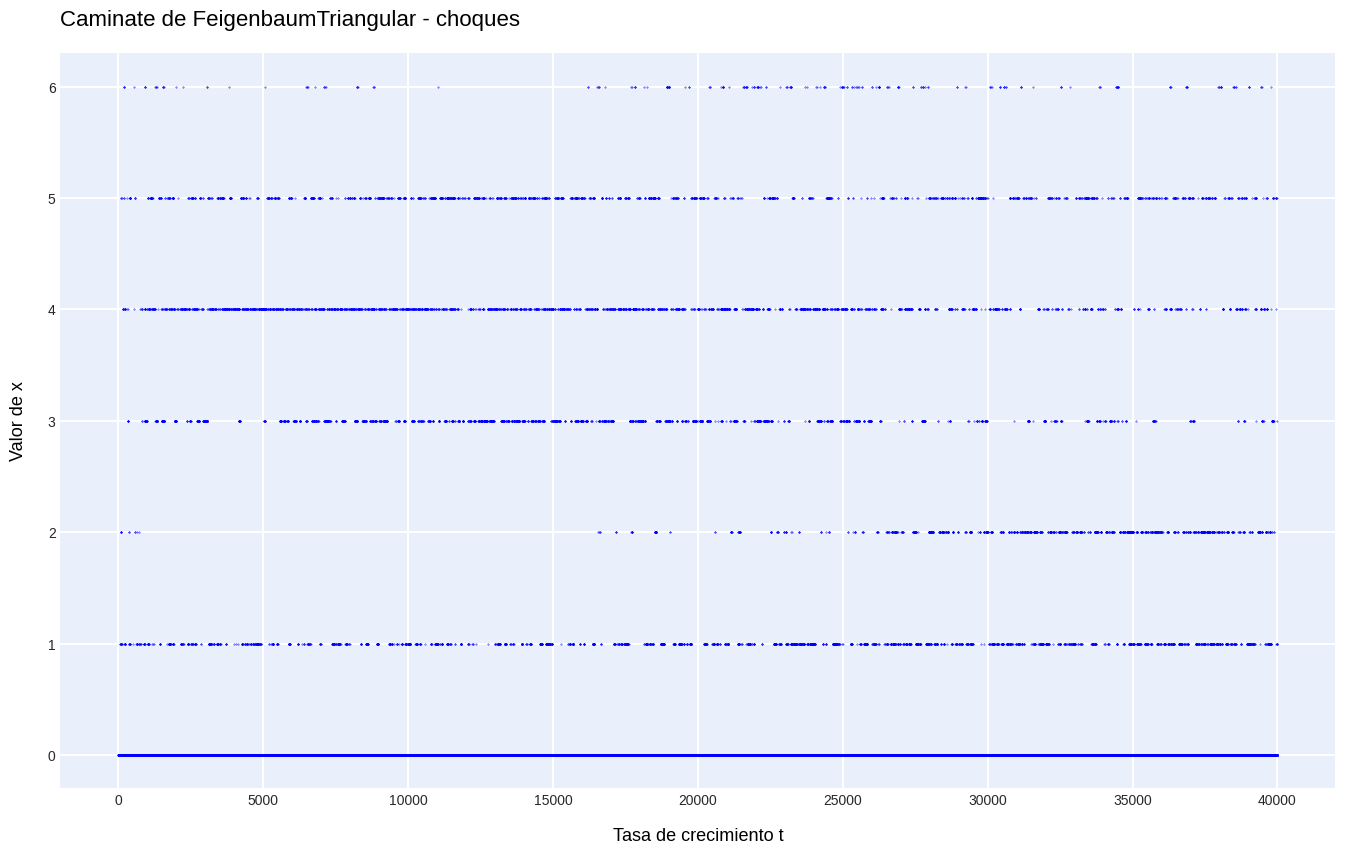

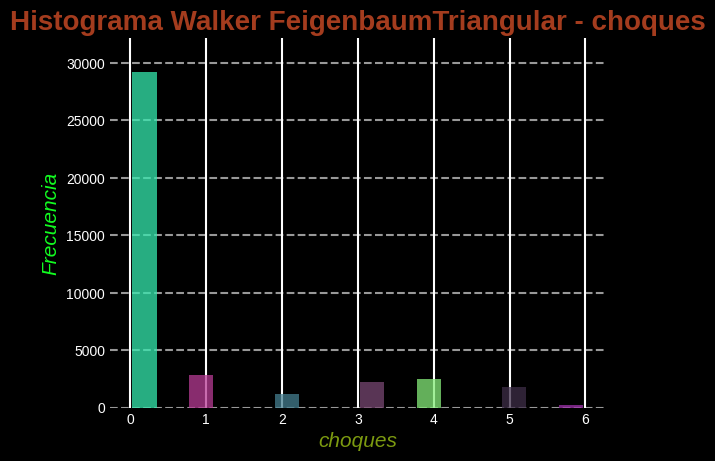

In [150]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(38, 32, 14), (33, 32, 14), (33, 26, 8), (26, 33, 8), (26, 33, 14), (19, 40, 14), (19, 40, 20), (26, 47, 20), (20, 47, 20), (14, 41, 20), (21, 34, 20), (21, 34, 26), (28, 41, 26), (28, 41, 32), (21, 48, 32), (21, 48, 26), (28, 41, 26), (22, 41, 26), (16, 35, 26), (23, 28, 26), (23, 28, 20), (30, 21, 20), (30, 21, 26), (37, 28, 26), (32, 28, 26), (32, 22, 20), (39, 29, 20), (33, 29, 20), (27, 23, 20), (34, 16, 20), (34, 16, 26), (27, 23, 26), (27, 23, 20), (34, 30, 20), (28, 30, 20), (22, 24, 20), (29, 17, 20), (29, 17, 14), (36, 24, 14), (30, 24, 14), (24, 18, 14), (31, 11, 14), (31, 11, 20), (24, 18, 20), (24, 18, 14), (31, 11, 14), (25, 11, 14), (19, 5, 14), (24, 0, 14), (24, 0, 8), (24, 0, 8), (24, 0, 14), (17, 7, 14), (17, 7, 8), (24, 0, 8), (24, 0, 14), (17, 7, 14), (17, 7, 8), (24, 14, 8), (18, 14, 8), (12, 8, 8), (19, 1, 8), (19, 1, 14), (26, 8, 14), (21, 8, 14), (21, 2, 8), (28, 9, 8), (28, 9, 14), (22, 15, 14), (22, 15, 8), (29, 8, 8), (29, 8, 2), (36, 1, 2), (36, 1, 8), (43,

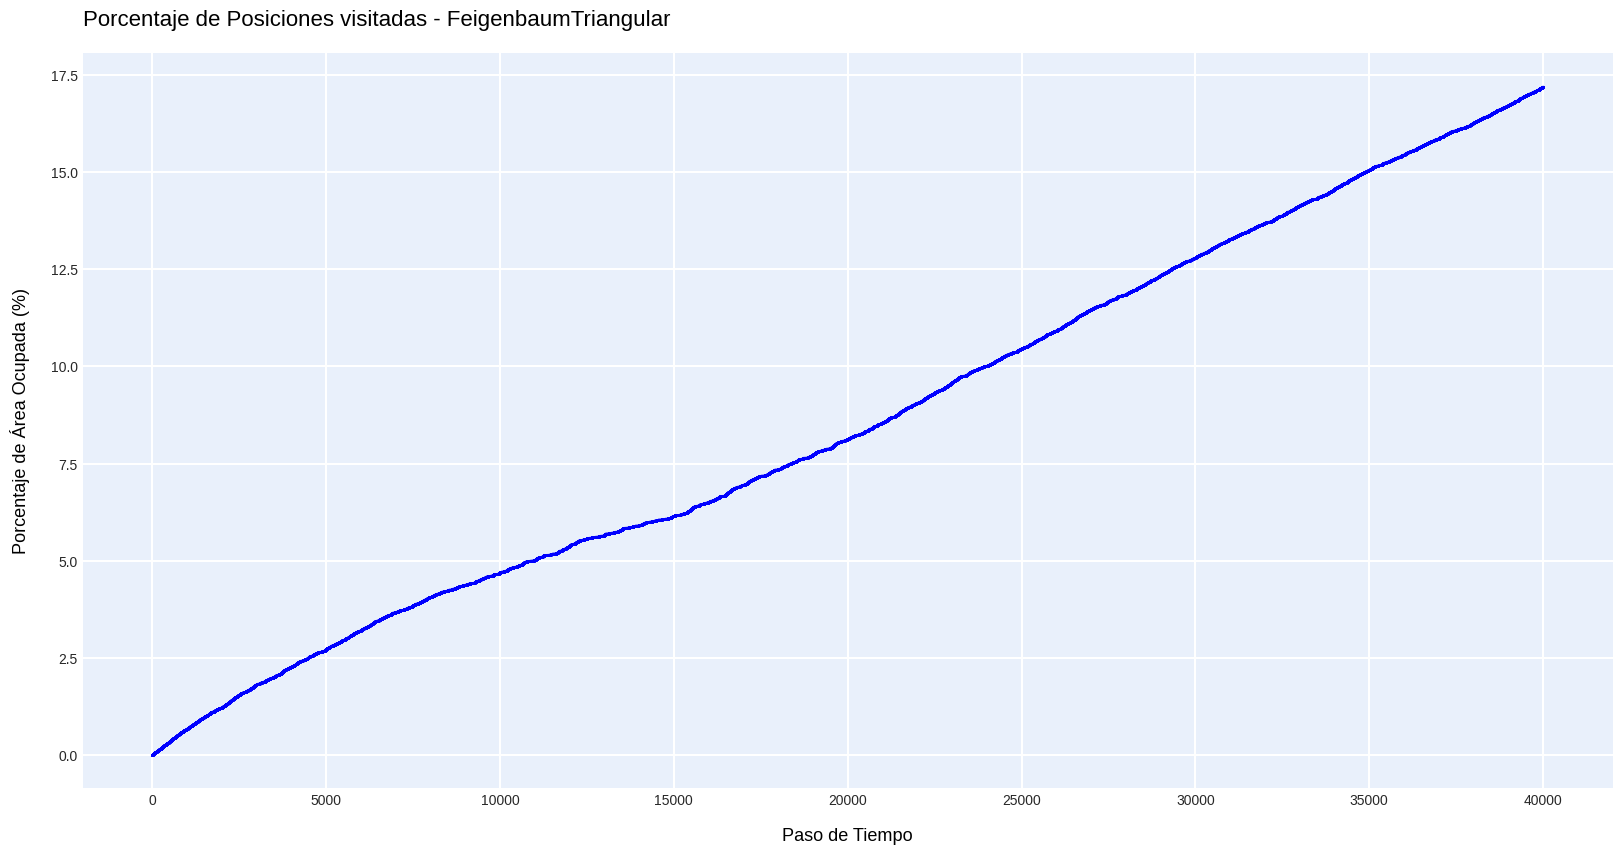

In [151]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Atractor de Henón

### Direcciones

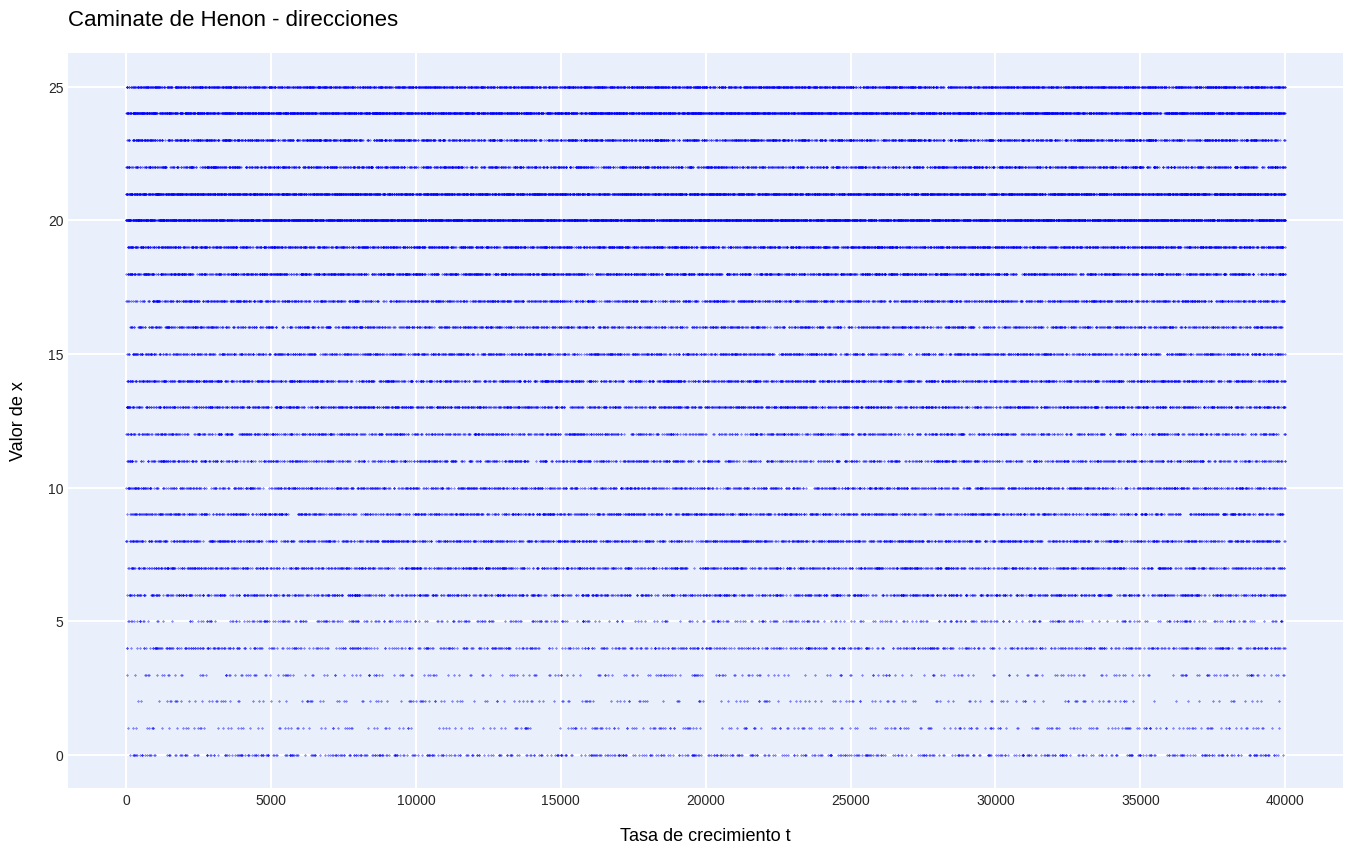

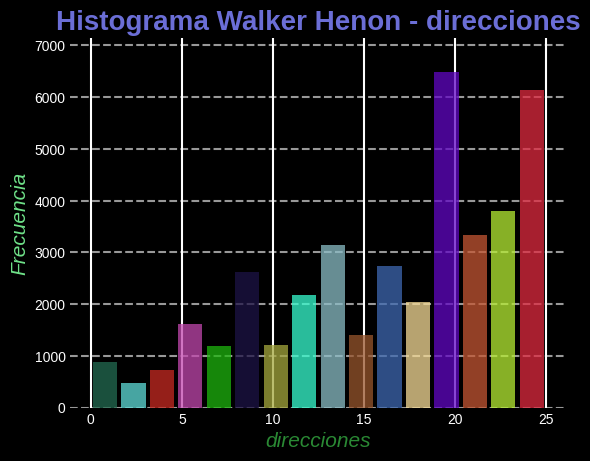

In [152]:
modelo = "transfhenon"
metrica = "direcciones"
folder = "Henon"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancias

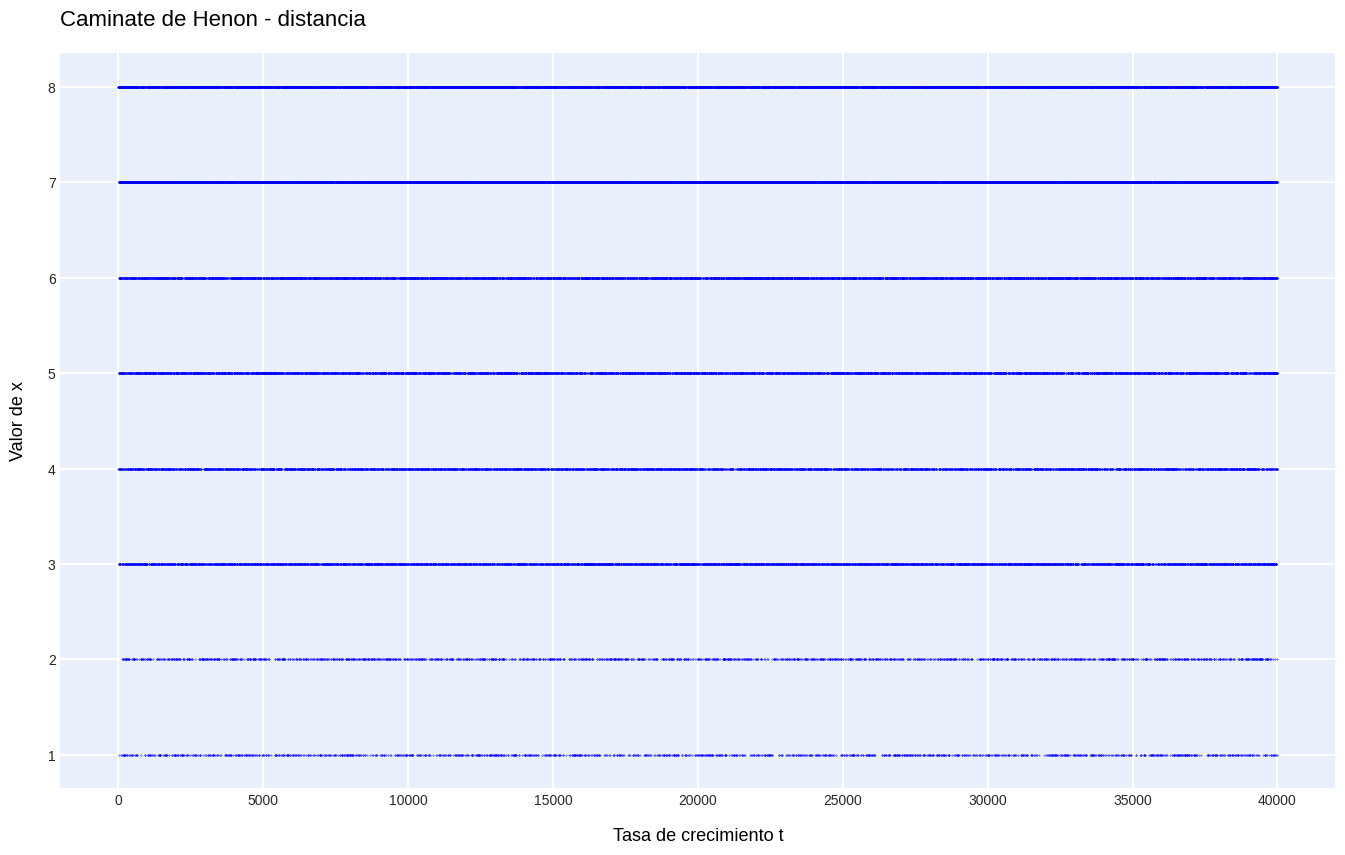

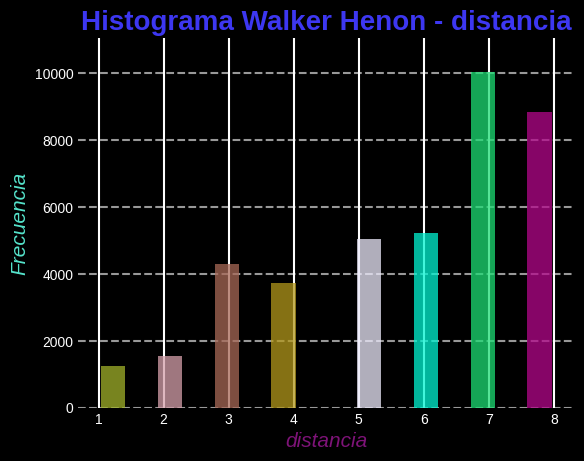

In [153]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

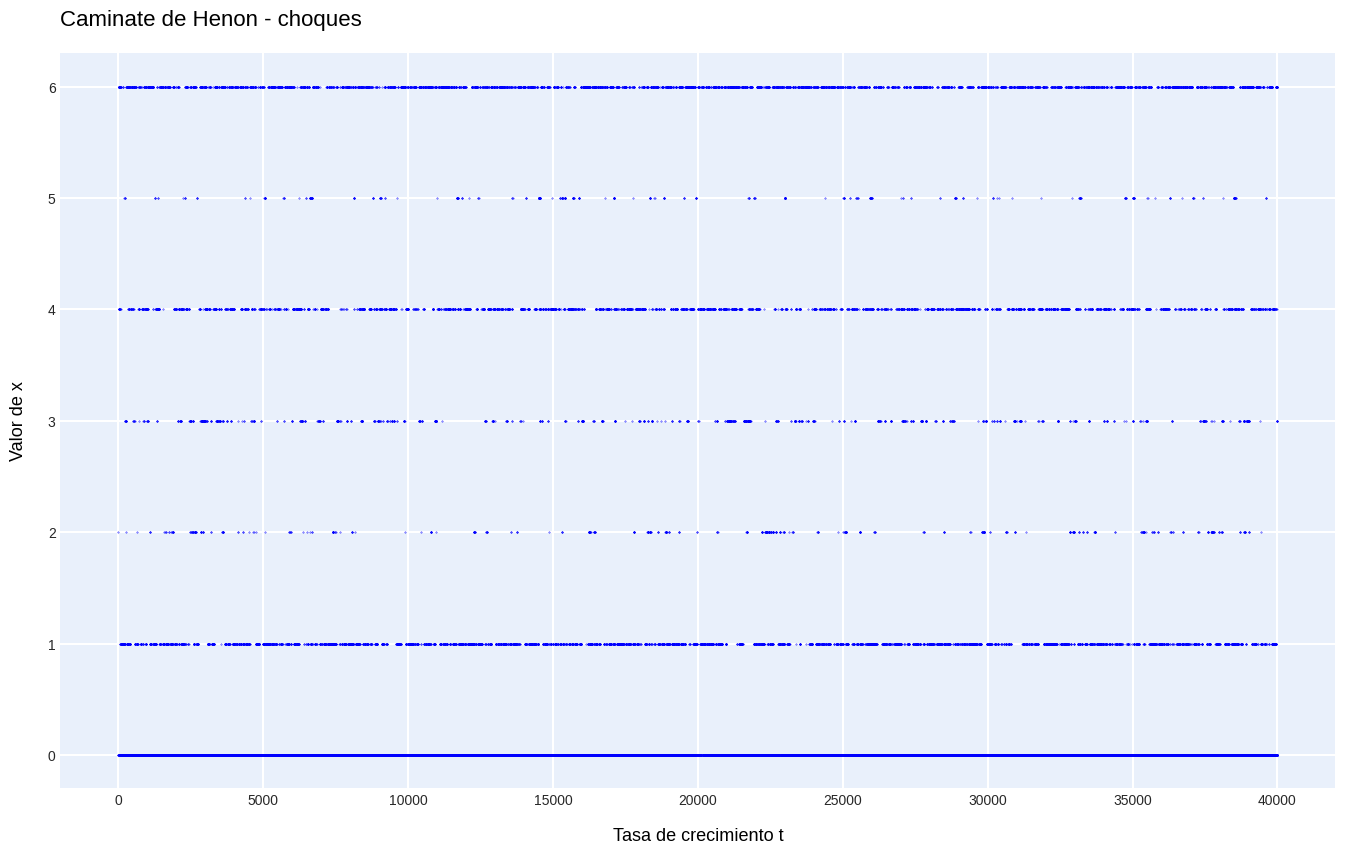

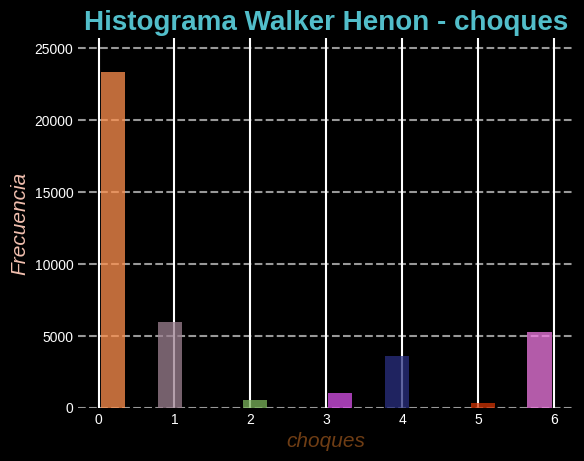

In [154]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(49, 18, 25), (49, 14, 21), (41, 6, 29), (33, 14, 21), (25, 6, 29), (30, 6, 24), (22, 6, 32), (19, 9, 32), (12, 2, 25), (7, 7, 30), (10, 4, 33), (3, 11, 33), (0, 8, 36), (6, 8, 42), (6, 15, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (3, 12, 49), (0, 15, 46), (0, 15, 46), (0, 15, 46), (3, 12, 49), (3, 12, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (4, 11, 49), (0, 11, 49), (0, 11, 49), (0, 11, 49), (7, 11, 42), (14, 18, 35), (18, 22, 39), (11, 29, 39), (3, 21, 47), (3, 27, 41), (9, 27, 47), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 27, 49), (11, 34, 42), (11, 30, 46), (8, 27, 49), (8, 27, 49), (13, 27, 44), (5, 19, 36), (5, 15, 32), (0, 10, 37), (0, 10, 37), (0, 10, 37), (0, 10, 31), (8, 2, 39), (10, 0, 37), (10, 0, 37), (10, 0, 37), (4, 6, 43), (7, 9, 40), (10, 9, 40), (3, 9, 47), (1, 11, 49), (0, 10, 48), (4, 6, 44), (4, 11, 49), (4, 11, 49), (10, 17, 49), (10, 17, 49), (10, 17, 49), (1

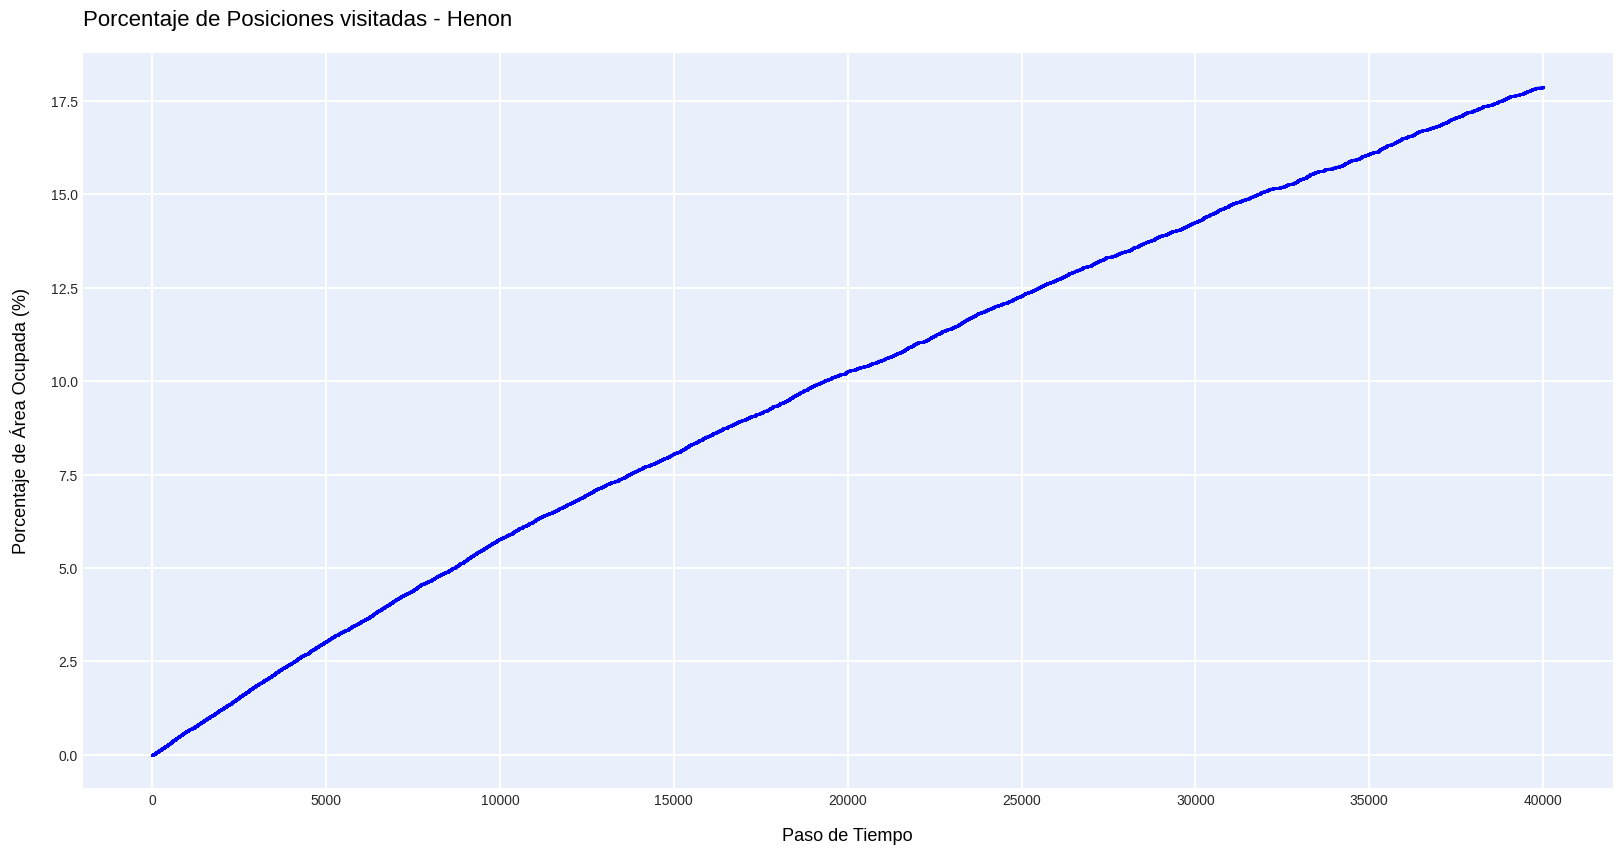

In [155]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Atractor Rossler

### Direcciones

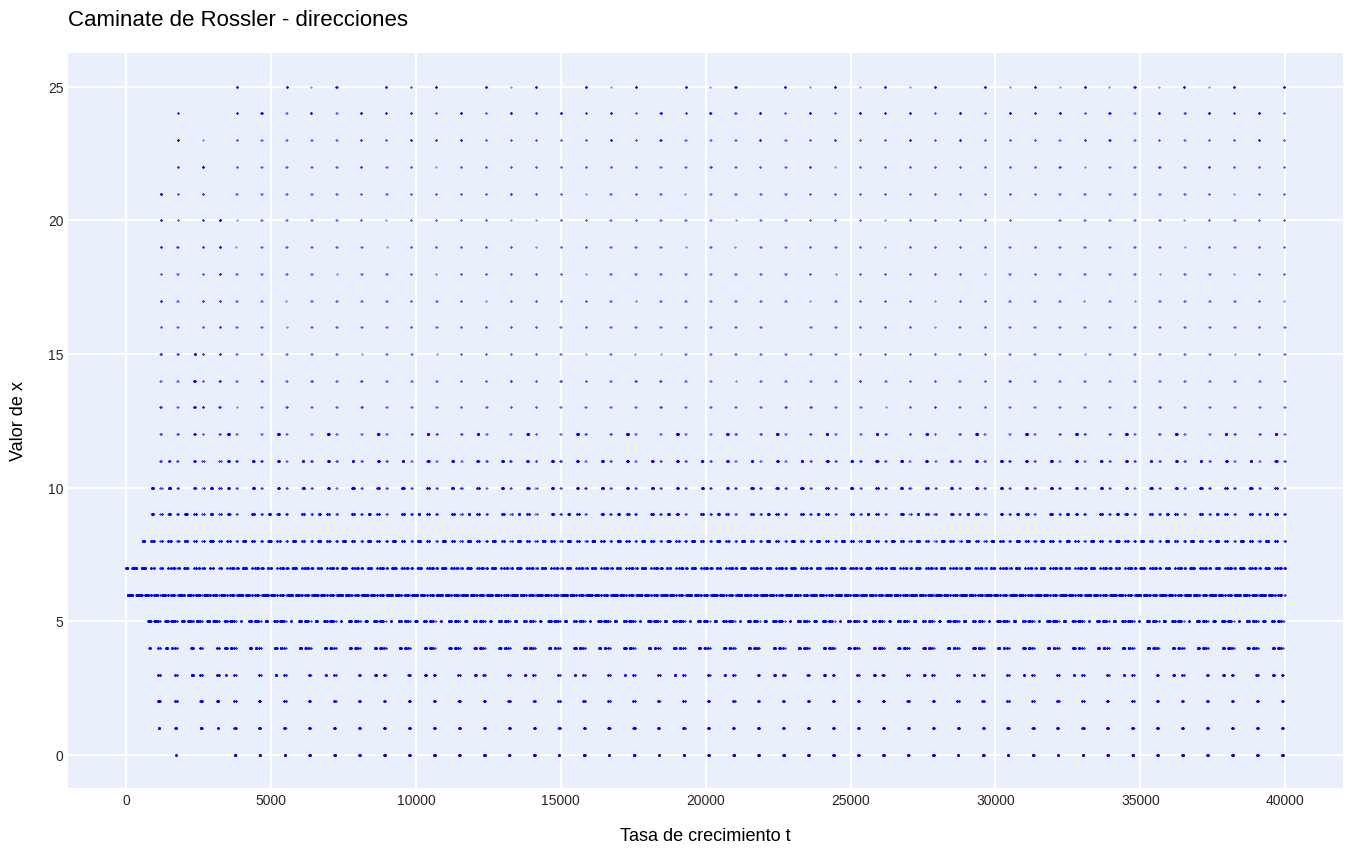

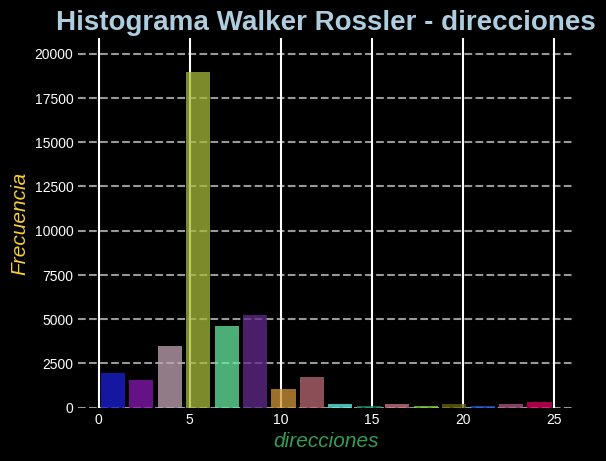

In [156]:
modelo = "transfrossler"
metrica = "direcciones"
folder = "Rossler"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancias

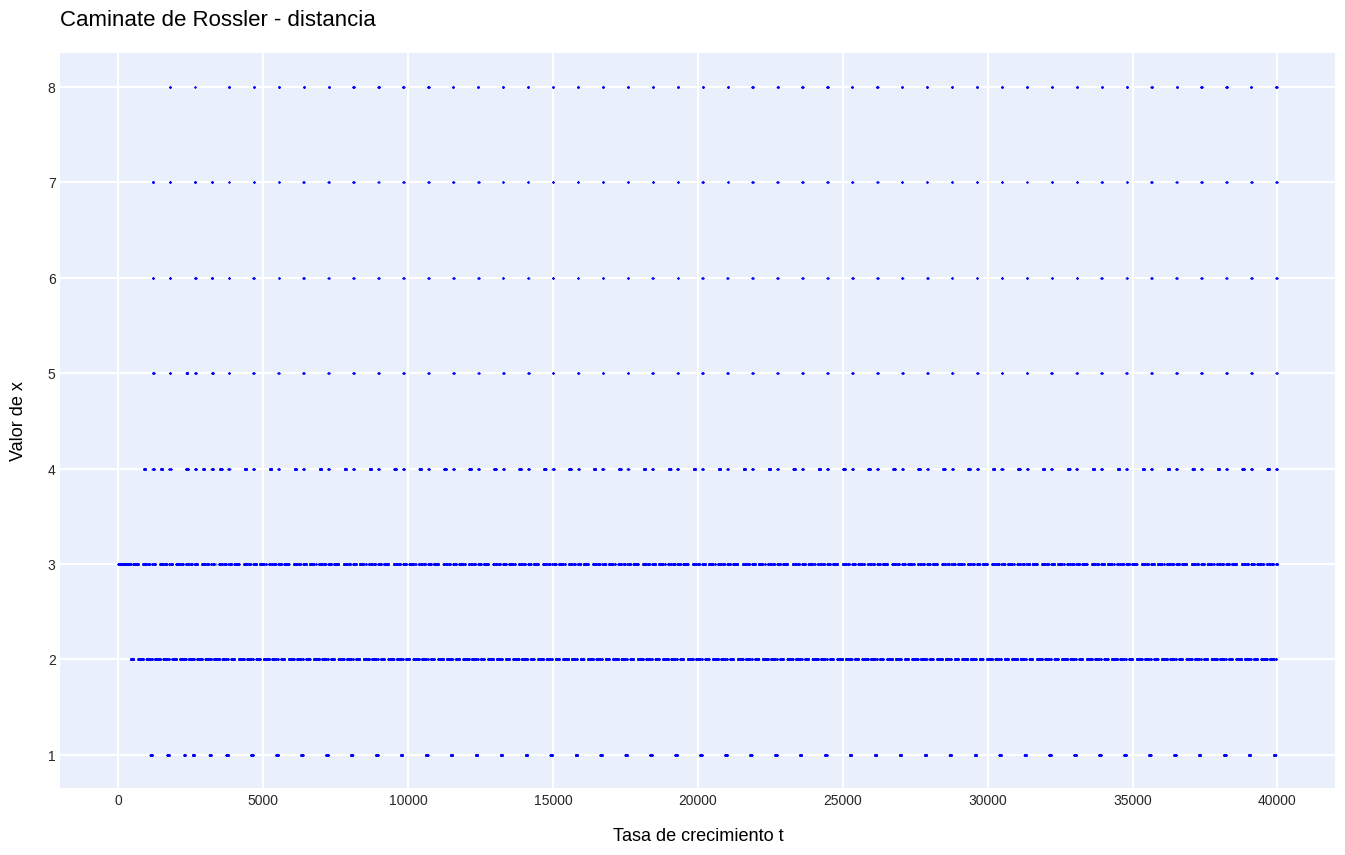

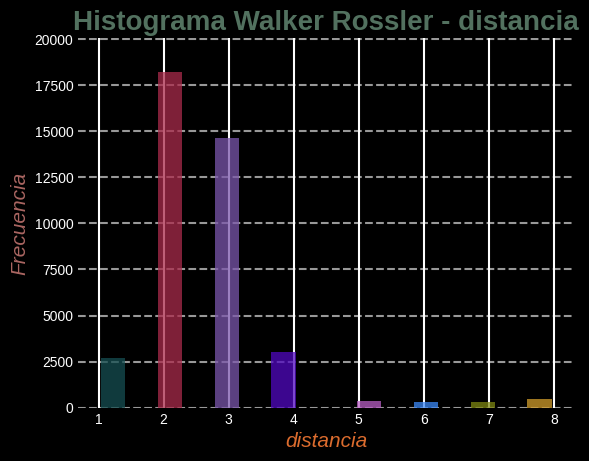

In [157]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

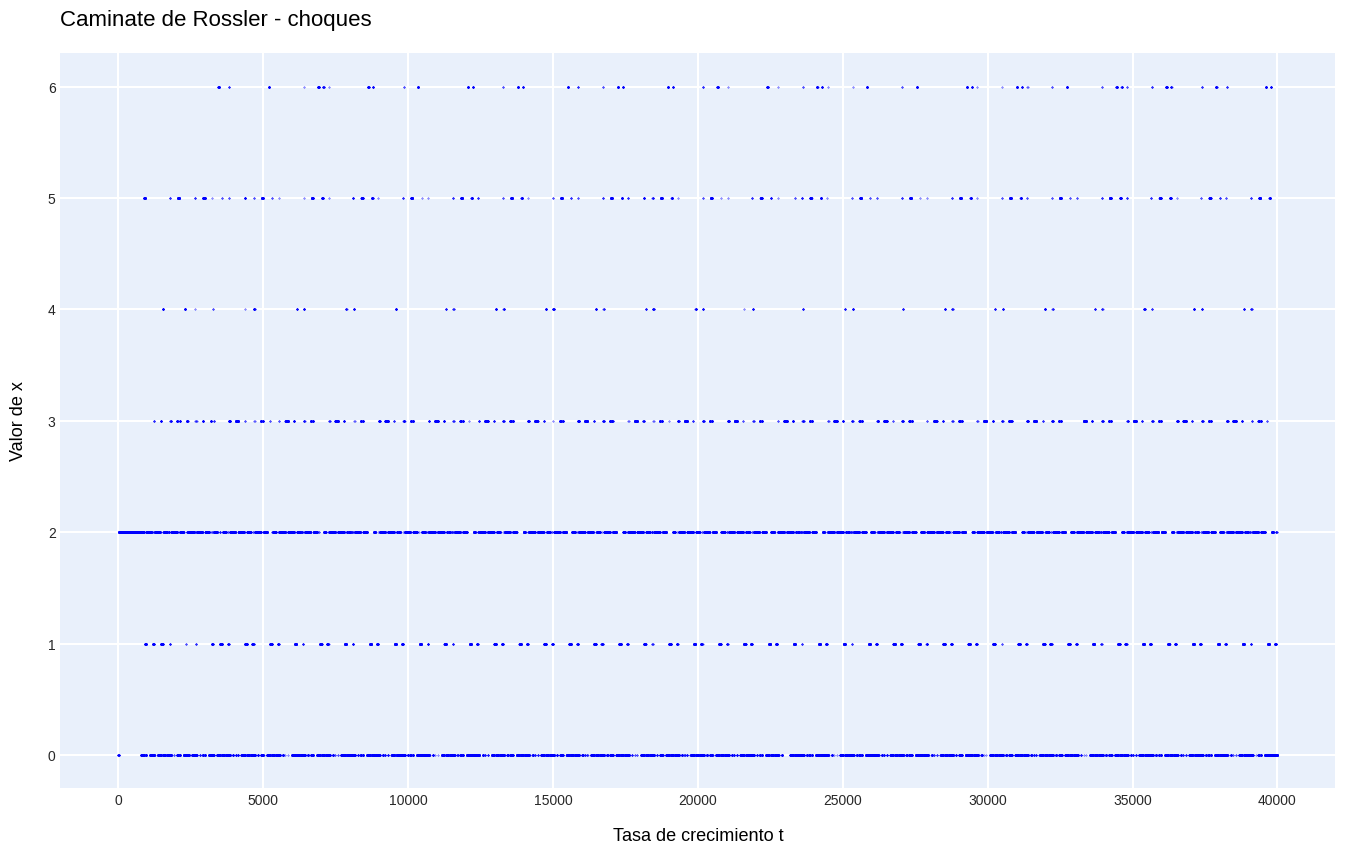

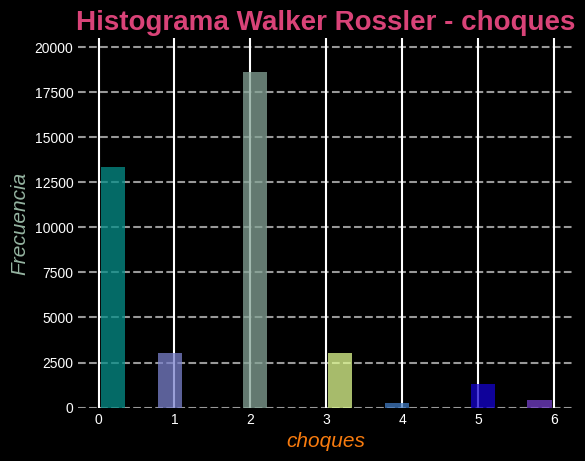

In [158]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones


[(25, 25, 19), (28, 28, 19), (31, 31, 19), (34, 34, 19), (37, 37, 19), (40, 40, 19), (43, 43, 19), (46, 46, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 49, 19), (49, 

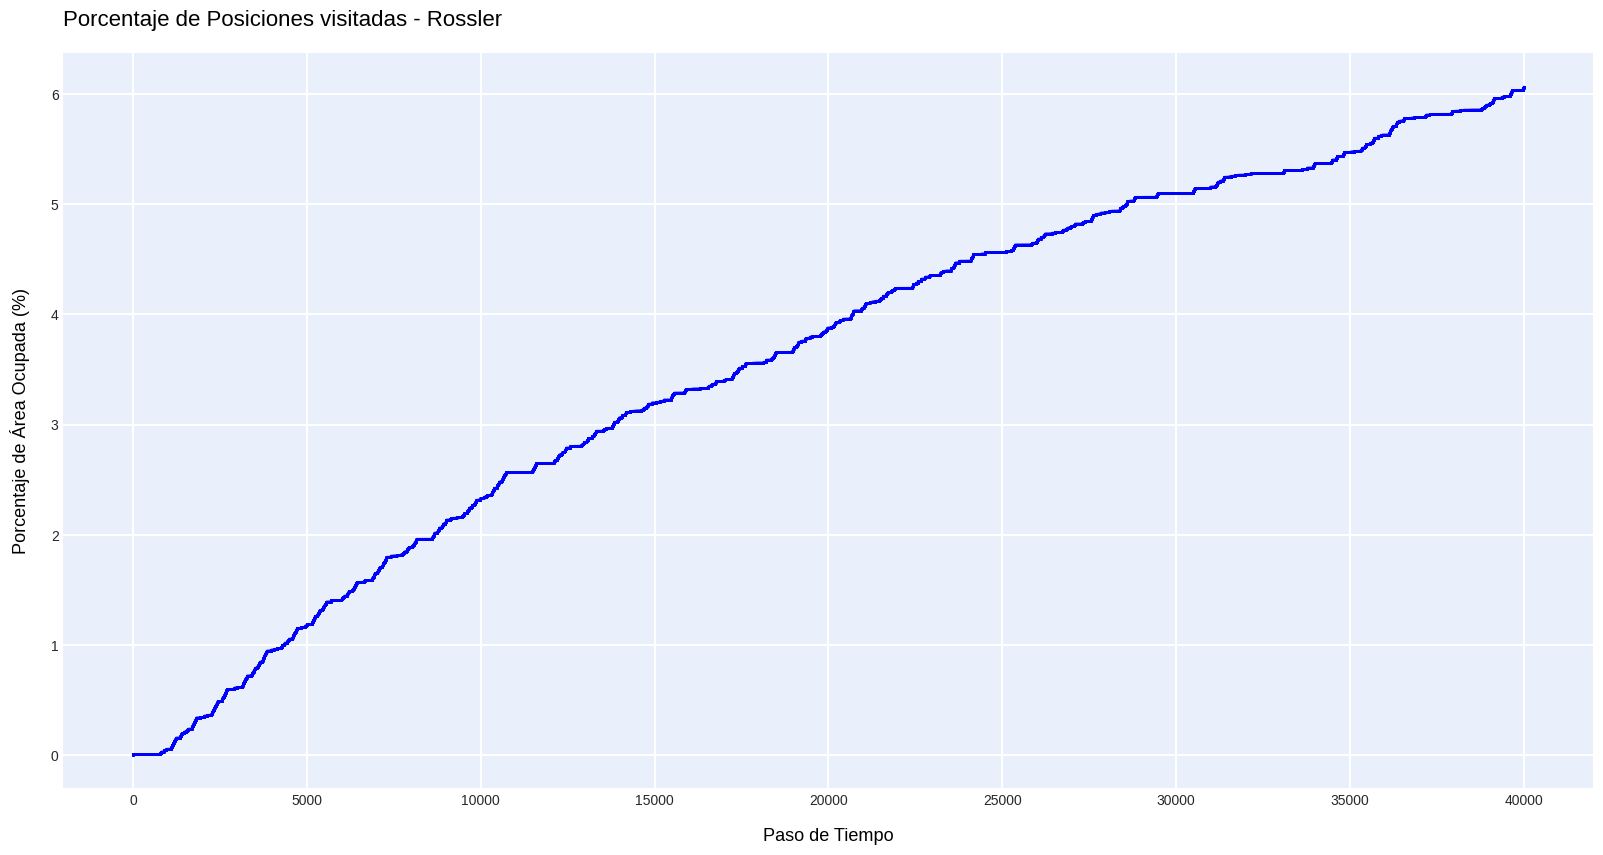

In [159]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")

## Atractor Lorentz

### Direcciones

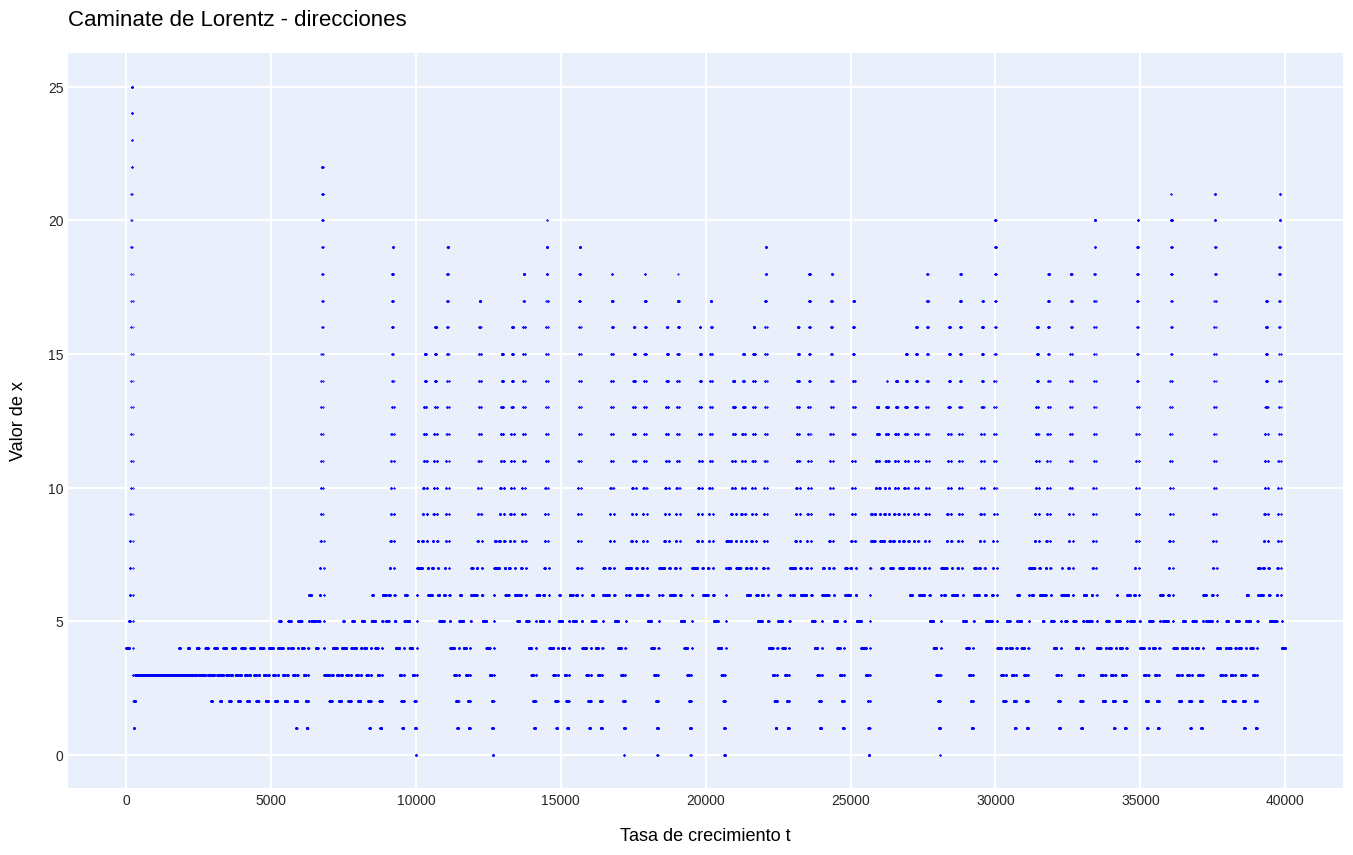

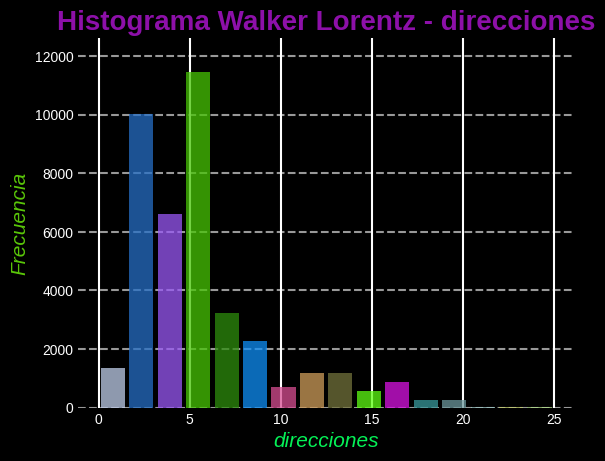

In [160]:
modelo = "transflorentz"
metrica = "direcciones"
folder = "Lorentz"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Distancias

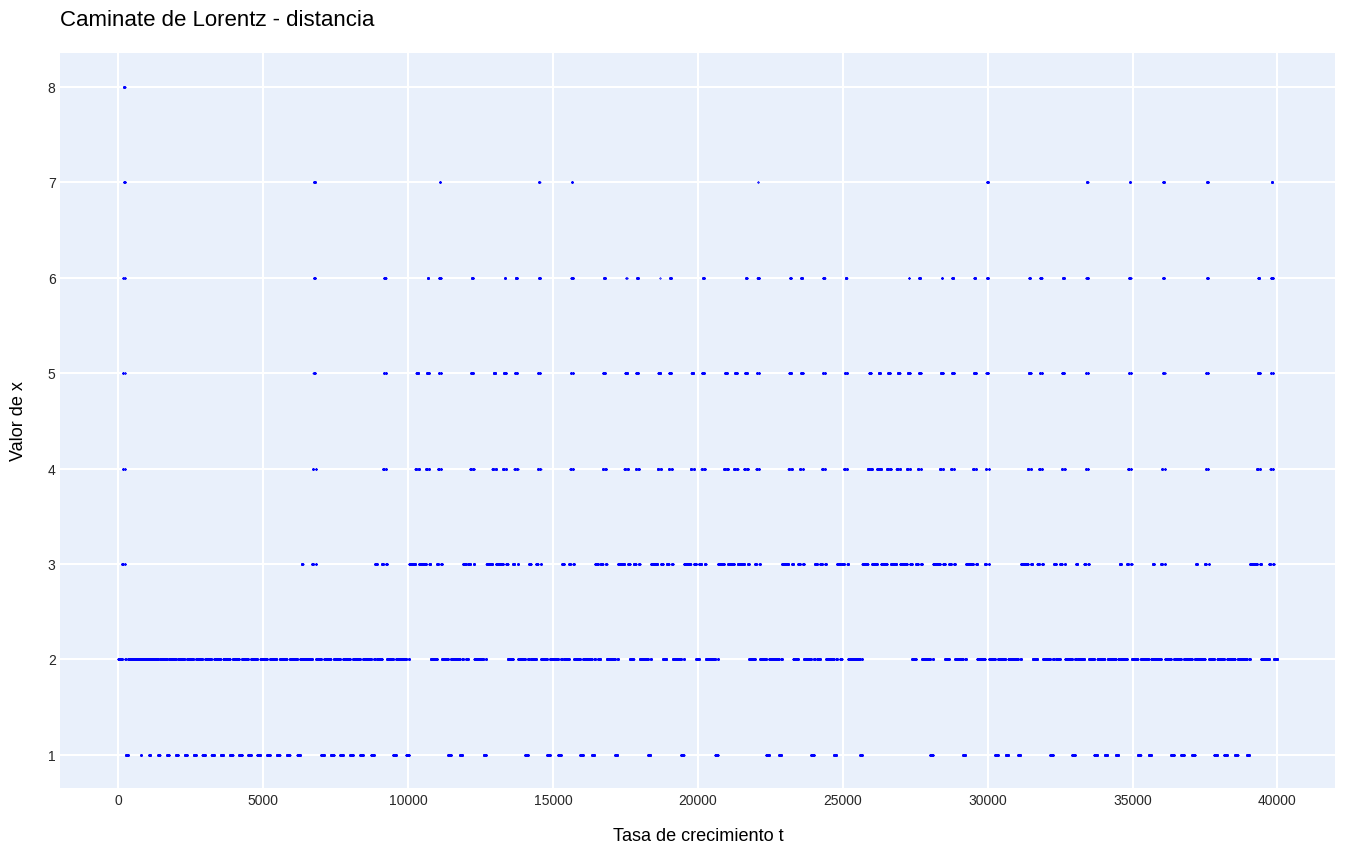

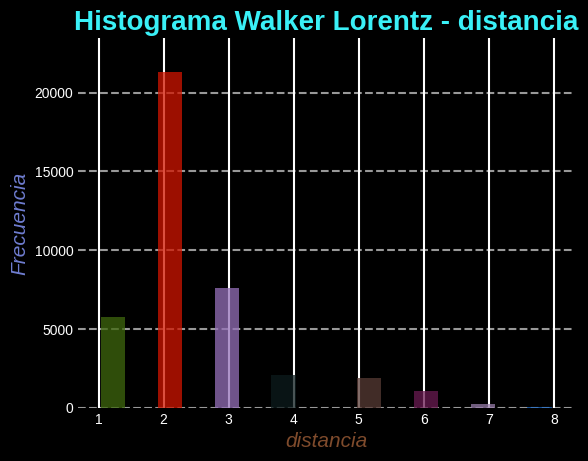

In [161]:
metrica = "distancia"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Choques

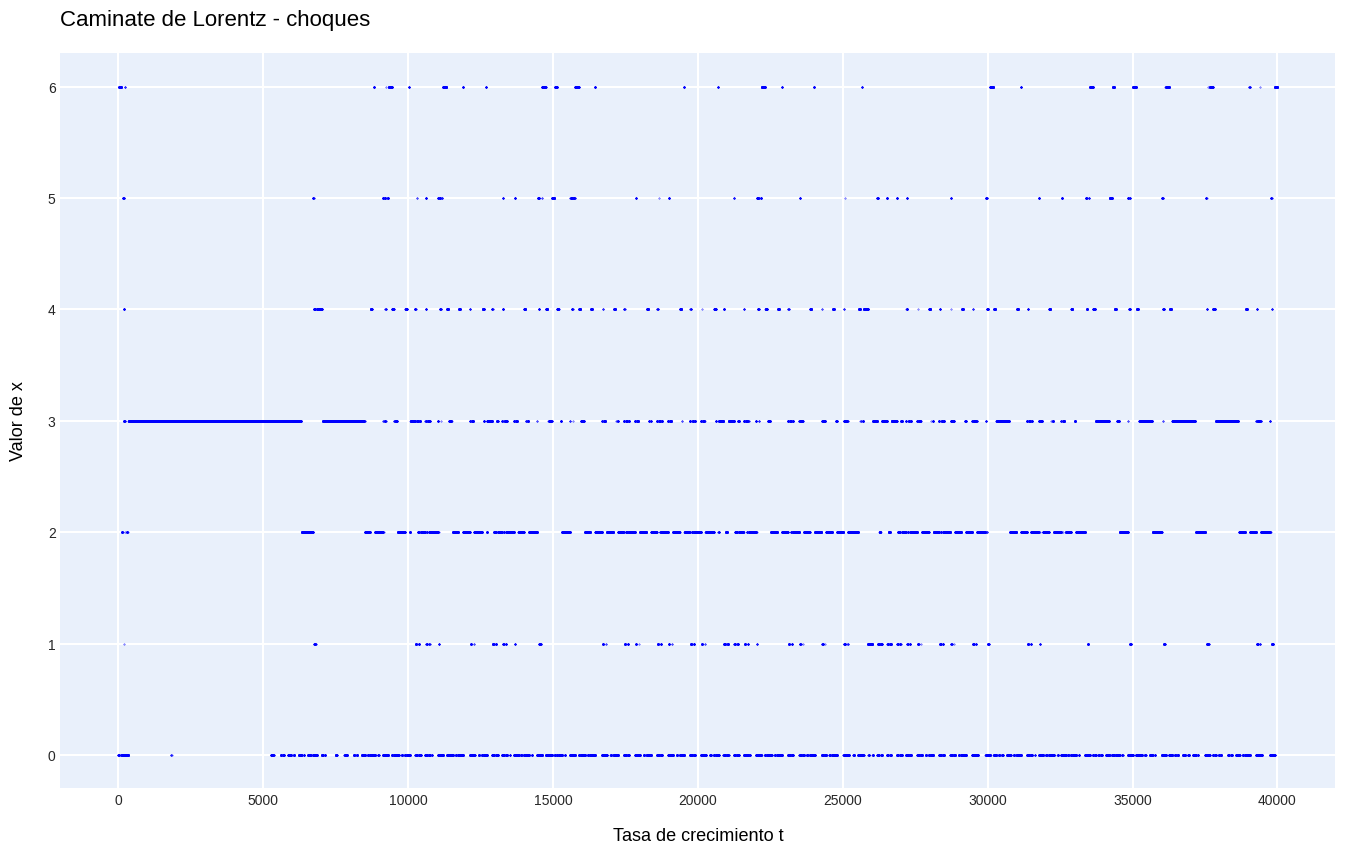

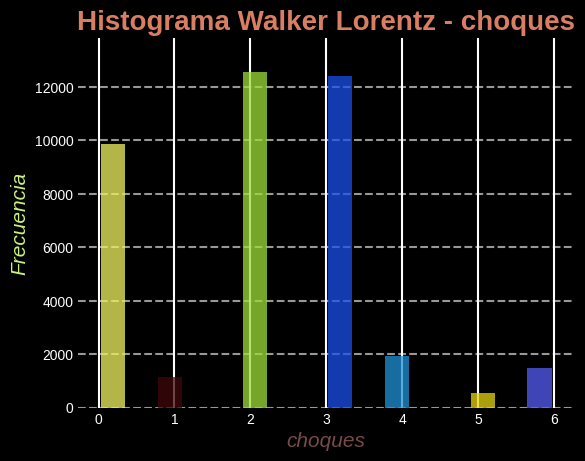

In [162]:
metrica = "choques"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ",")
tiempo = range(1, 40001)
graficar(walker_feig, tiempo, width=10, height=7 ,titulo=f"Caminate de {folder} - {metrica}")
plotear_hist(walker_feig, f"Histograma Walker {folder} - {metrica}", metrica, "Frecuencia")

### Posiciones

[(47, 24, 8), (47, 24, 10), (47, 24, 12), (47, 24, 14), (47, 24, 16), (47, 24, 18), (47, 24, 20), (47, 24, 22), (47, 24, 24), (47, 24, 26), (47, 24, 28), (47, 24, 30), (47, 24, 32), (47, 24, 34), (47, 24, 36), (47, 24, 38), (47, 24, 40), (47, 24, 42), (47, 24, 44), (47, 24, 46), (47, 24, 48), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 24, 49), (47, 2

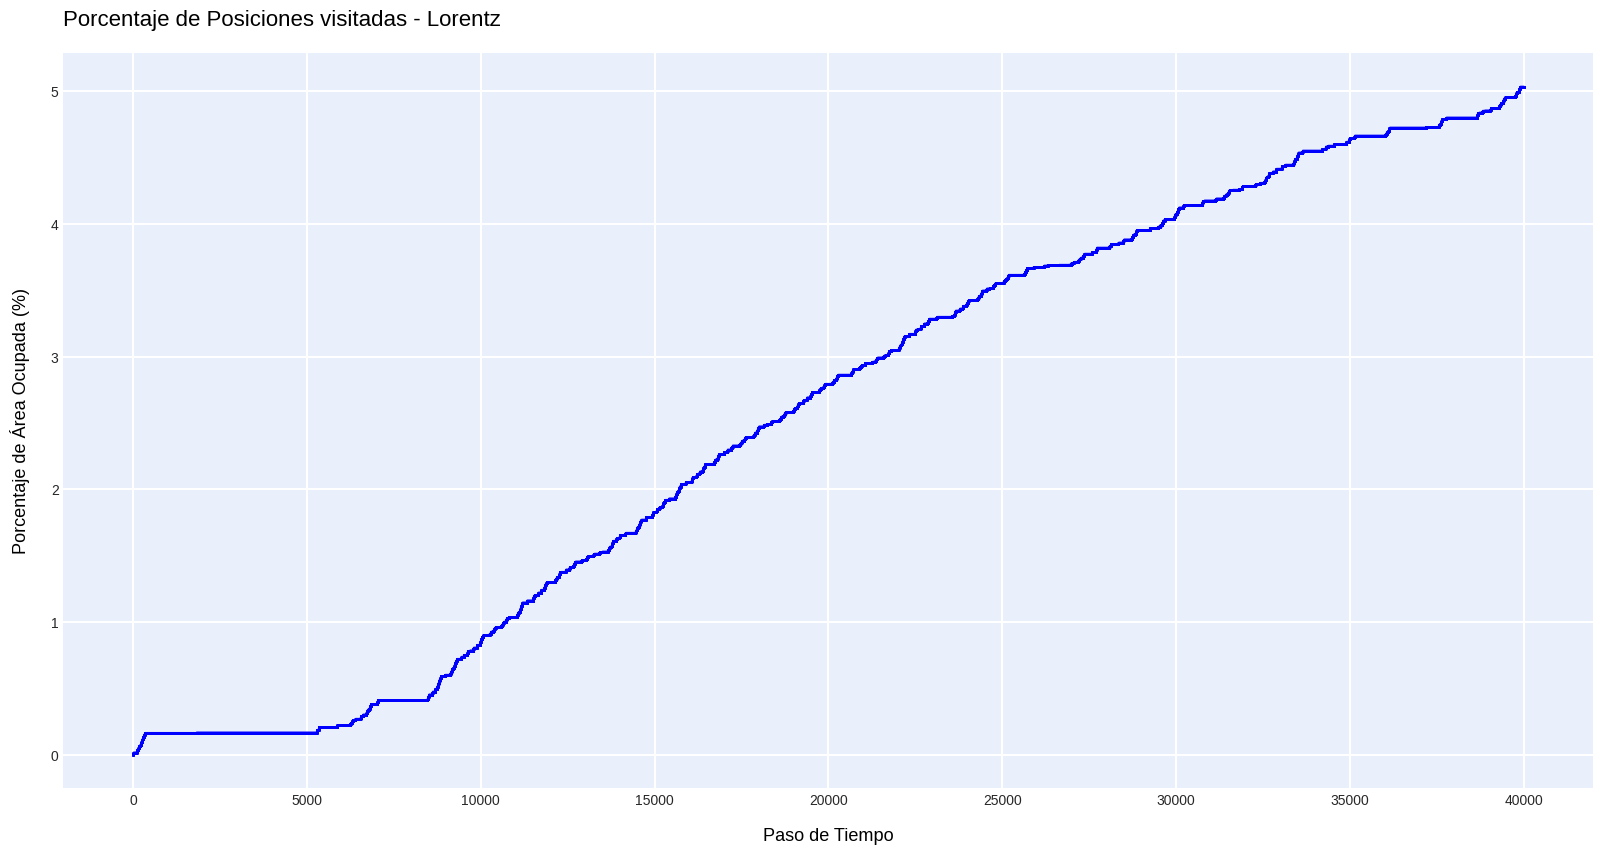

In [163]:
metrica = "posiciones"
walker_feig = cargar_csv(f"datos/{folder}/{metrica}_{modelo}0.txt", ";")
print(walker_feig)
plot_occupied_area_custom_style_updated(49, walker_feig, title=f"Porcentaje de Posiciones visitadas - {folder}")